In [ ]:

# 한글 깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and di

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* 가격, 거래량, 경유가격 : 품목별, 일별
* 귀농인구, 재배면적, 생산량 : 품목별, 연도별
* 재료비, 고무비, 경비, 자산구입비, 농업교역조건, 농산물가격지수 : 연도별, 월별


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/응통2021/추가 데이터/통합3.csv")
df = df.loc[:, ['date', '연도', '월', '일', '품목', '주산지', '요일', '가격', '거래량', '경유가격', '농산물']]
df.head()

date    연도  월  일  품목 주산지   요일     가격        거래량     경유가격     농산물
0  2016-01-01  2016  1  1  배추  전남  금요일    0.0        0.0  1191.69  101.55
1  2016-01-02  2016  1  2  배추  전남  토요일  329.0    80860.0  1190.58  101.55
2  2016-01-03  2016  1  3  배추  전남  일요일    0.0        0.0  1189.58  101.55
3  2016-01-04  2016  1  4  배추  전남  월요일  478.0  1422742.5  1187.96  101.55
4  2016-01-05  2016  1  5  배추  전남  화요일  442.0  1167241.0  1185.81  101.55

# 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36393 entries, 0 to 36392
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    36393 non-null  object 
 1   연도      36393 non-null  int64  
 2   월       36393 non-null  int64  
 3   일       36393 non-null  int64  
 4   품목      36393 non-null  object 
 5   주산지     36393 non-null  object 
 6   요일      36393 non-null  object 
 7   가격      36393 non-null  float64
 8   거래량     36393 non-null  float64
 9   경유가격    36393 non-null  float64
 10  농산물     36393 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 3.1+ MB


In [ ]:
df_baechu = df.query('품목 == "배추"')
df_onion = df.query('품목 == "양파"')
df_gungochu = df.query('품목 == "건고추"')
df_maneul = df.query('품목 == "마늘"')
df_daepa = df.query('품목 == "대파"')
df_eolbaechu = df.query('품목 == "얼갈이배추"')
df_leaf = df.query('품목 == "깻잎"')
df_sigeumchi = df.query('품목 == "시금치"')
df_minary = df.query('품목 == "미나리"')
df_paprica = df.query('품목 == "파프리카"')
df_newsong = df.query('품목 == "새송이"')
df_mushroom = df.query('품목 == "팽이버섯"')
df_tomato = df.query('품목 == "토마토"')
df_sangchu = df.query('품목 == "청상추"')
df_baekdada = df.query('품목 == "백다다기"')
df_pumpkin = df.query('품목 == "애호박"')
df_cambel = df.query('품목 == "캠벨얼리"')
df_mu = df.query('품목 == "무"')
df_carrot = df.query('품목 == "당근"')
df_shine = df.query('품목 == "샤인마스캇"')
df_ybaechu = df.query('품목 == "양배추"')

# df들을 모아둔 리스트 : df_list
df_list = [df_mu, df_carrot, df_shine, df_ybaechu,  df_baechu, df_onion, df_gungochu, df_maneul, df_daepa, df_eolbaechu, df_leaf, df_sigeumchi, df_minary, df_paprica, df_newsong, df_mushroom, df_tomato, df_sangchu ,df_baekdada, df_pumpkin, df_cambel]

In [ ]:
# 품목별 결측치 구하기
for item in df['품목'].unique():
    print('---------------------------------------')
    print(item, '의 결측치')
    df_null = df[df['품목'] == item].isnull().sum()
    print(df_null[df_null != 0])

---------------------------------------
배추 의 결측치
Series([], dtype: int64)
---------------------------------------
무 의 결측치
Series([], dtype: int64)
---------------------------------------
양파 의 결측치
Series([], dtype: int64)
---------------------------------------
건고추 의 결측치
Series([], dtype: int64)
---------------------------------------
마늘 의 결측치
Series([], dtype: int64)
---------------------------------------
대파 의 결측치
Series([], dtype: int64)
---------------------------------------
얼갈이배추 의 결측치
Series([], dtype: int64)
---------------------------------------
양배추 의 결측치
Series([], dtype: int64)
---------------------------------------
깻잎 의 결측치
Series([], dtype: int64)
---------------------------------------
시금치 의 결측치
Series([], dtype: int64)
---------------------------------------
미나리 의 결측치
Series([], dtype: int64)
---------------------------------------
당근 의 결측치
Series([], dtype: int64)
---------------------------------------
파프리카 의 결측치
Series([], dtype: int64)
------------------------------

In [ ]:
#pip install missingno
import missingno as msno

In [ ]:
# 전체 결측치 확인
df.isnull().sum()

date    0
연도      0
월       0
일       0
품목      0
주산지     0
요일      0
가격      0
거래량     0
경유가격    0
농산물     0
dtype: int64

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
df2 = df.loc[:, ['date', '연도', '월', '일', '품목', '주산지', '요일', '가격', '거래량', '경유가격', '농산물']]

In [ ]:
df2.isnull().sum()

date    0
연도      0
월       0
일       0
품목      0
주산지     0
요일      0
가격      0
거래량     0
경유가격    0
농산물     0
dtype: int64

In [ ]:
df2.head(2)

date    연도  월  일  품목 주산지   요일     가격      거래량     경유가격     농산물
0  2016-01-01  2016  1  1  배추  전남  금요일    0.0      0.0  1191.69  101.55
1  2016-01-02  2016  1  2  배추  전남  토요일  329.0  80860.0  1190.58  101.55

In [ ]:
df2['연도'].value_counts()

2016    7686
2019    7665
2018    7665
2017    7665
2020    5712
Name: 연도, dtype: int64

In [ ]:
df2.query('연도 == 2020')

date    연도  월   일     품목  ...   요일       가격        거래량     경유가격     농산물
1461   2020-01-01  2020  1   1     배추  ...  수요일      0.0        0.0  1387.64  118.41
1462   2020-01-02  2020  1   2     배추  ...  목요일    861.0    72521.2  1388.14  118.41
1463   2020-01-03  2020  1   3     배추  ...  금요일    817.0  1470213.6  1388.73  118.41
1464   2020-01-04  2020  1   4     배추  ...  토요일    827.0  1114916.4  1389.72  118.41
1465   2020-01-05  2020  1   5     배추  ...  일요일      0.0        0.0  1389.67  118.41
...           ...   ... ..  ..    ...  ...  ...      ...        ...      ...     ...
36388  2020-09-24  2020  9  24  샤인마스캇  ...  목요일  10940.0   283196.9  1128.91  139.93
36389  2020-09-25  2020  9  25  샤인마스캇  ...  금요일  10844.0   303779.6  1128.43  139.93
36390  2020-09-26  2020  9  26  샤인마스캇  ...  토요일  10636.0   313295.7  1127.22  139.93
36391  2020-09-27  2020  9  27  샤인마스캇  ...  일요일  10699.0     9734.0  1126.94  139.93
36392  2020-09-28  2020  9  28  샤인마스캇  ...  월요일  10998.0   382263.4  1126.46  139.93

[5712 rows x 11 columns]

2020년 데이터는 9월 28일까지만 있다.

# 상관관계

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

## 전체 상관계수

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



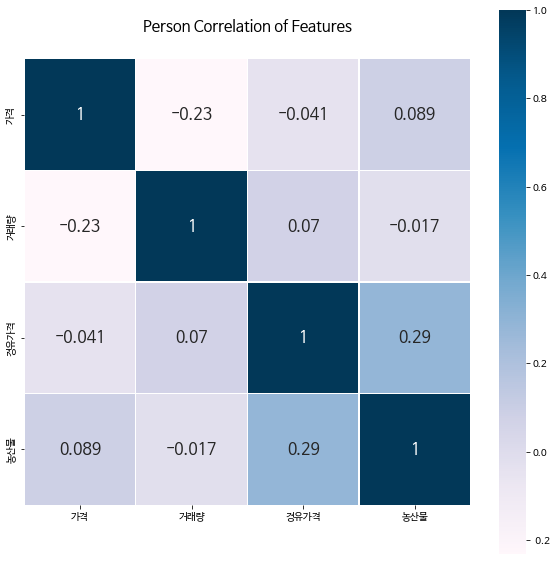

In [ ]:
heatmap_data = df2.iloc[:, 7:]
colormap = plt.cm.PuBu
plt.figure(figsize = (10, 10))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})



* 가격에 영향을 주는 변수는 딱히 없다.

## 품목별 상관계수

In [ ]:
fig = plt.figure(figsize = (30, 28))
for i in range(len(df2['품목'].unique())):
    plt.subplot(5, 5, i+1)
    name = df2['품목'].unique()[i]
    df_item = df2.query('품목 == "{}"'.format(name))
    heatmap_data = df_item[['가격', '경유가격', '거래량', '농산물']]
    colormap = plt.cm.PuBu

    plt.title(name, y = 1.05, size = 15) 
    plt.xticks(rotation = 0)
    sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



- 무 : 거래량 --> 0.48
-대파 : 거래량 --> 0.63
-얼갈이배추 : 거래량 --> 0.52
-양배추 : 거래량 --> 0.49
-당근 : 거래량 --> 0.64
-새송이 : 거래량 --> 0.85


* 상관계수가 안좋은데 경유가격, 농산물 가격 지수, 거래량을 변수에 남겨둔 이유?
* --> 유일한 일별 데이터, 논문 참고,,

배추



무



양파


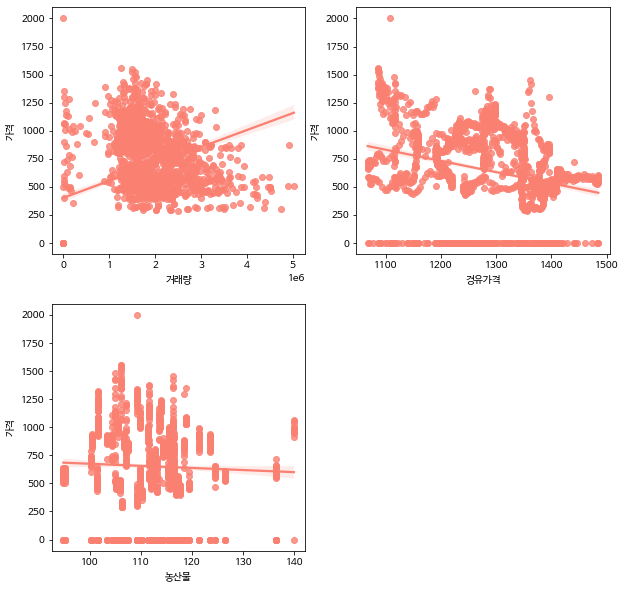


건고추



마늘


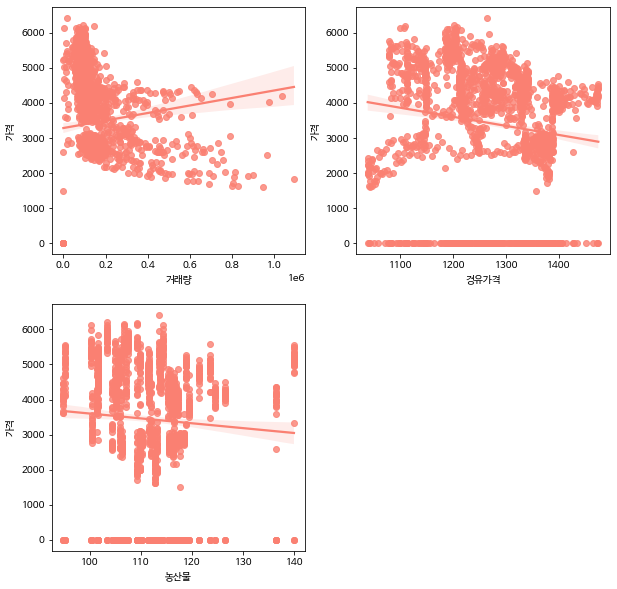


대파


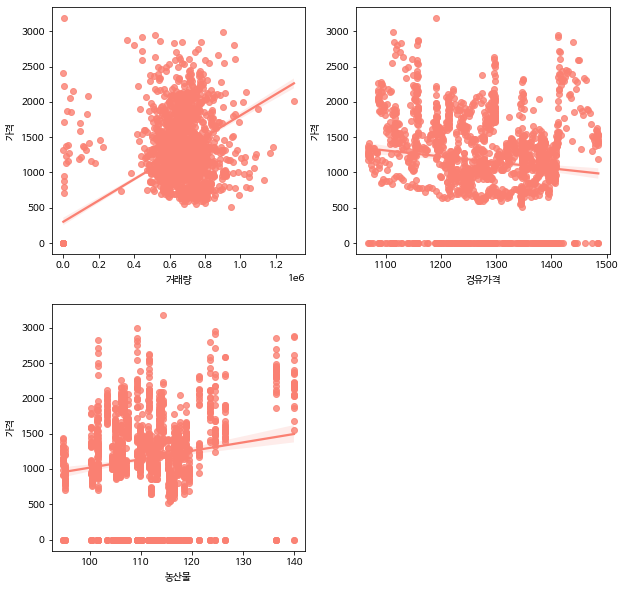


얼갈이배추


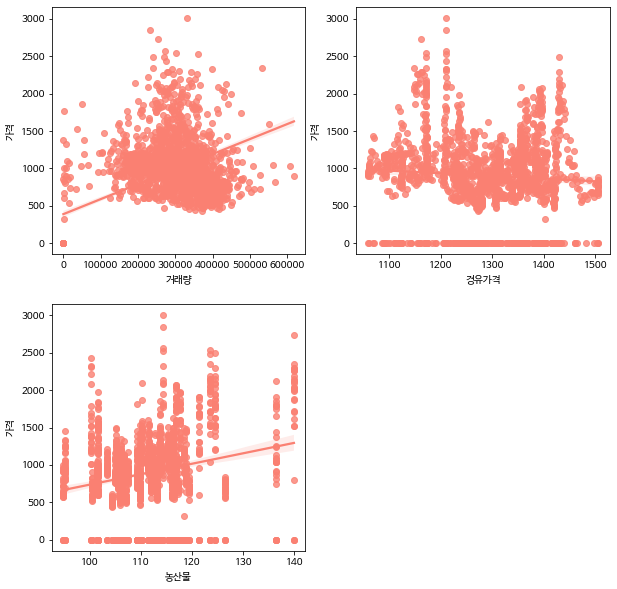


양배추


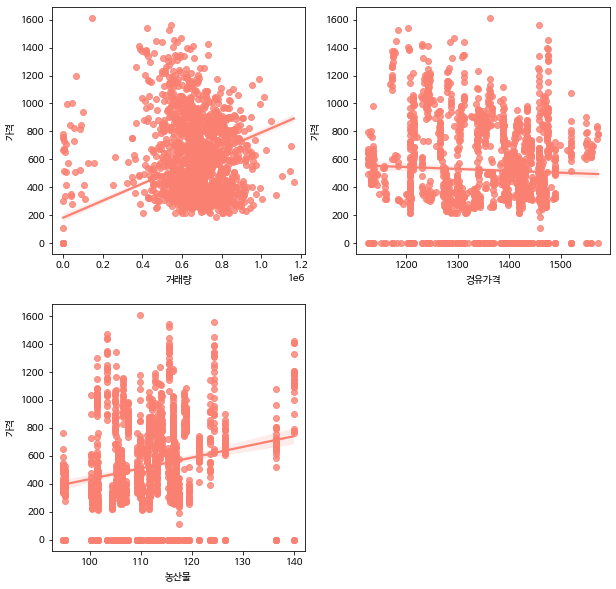


깻잎


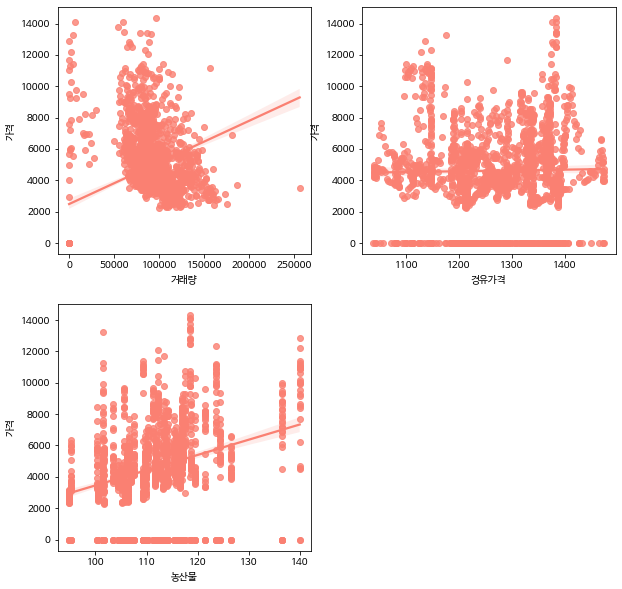


시금치


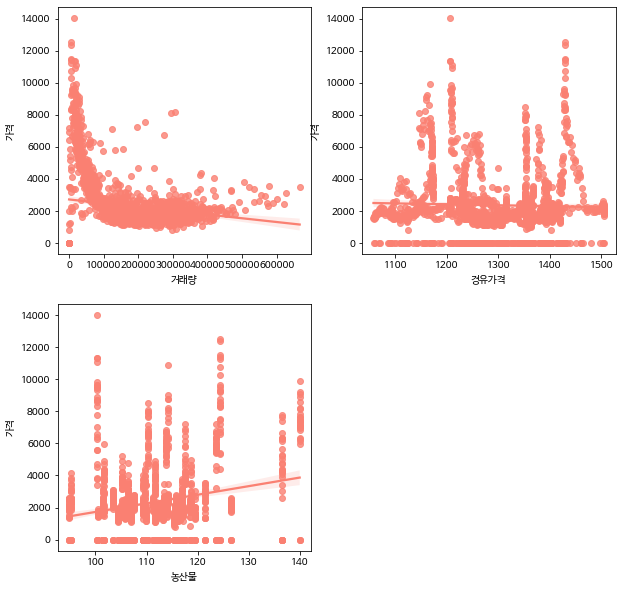


미나리



당근


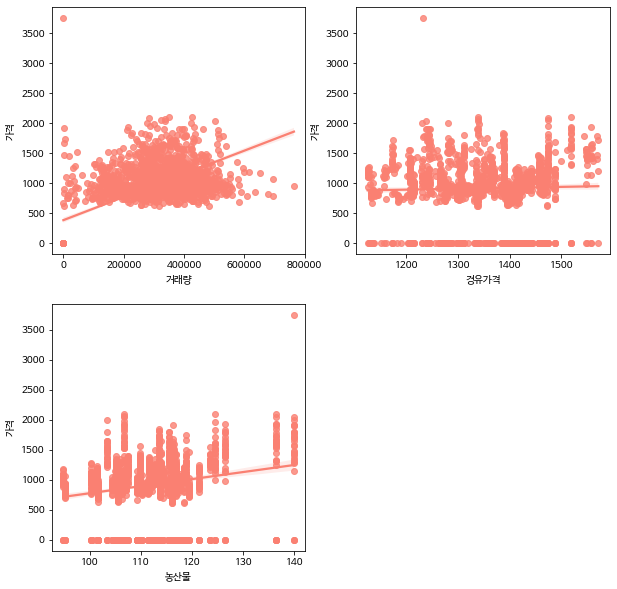


파프리카


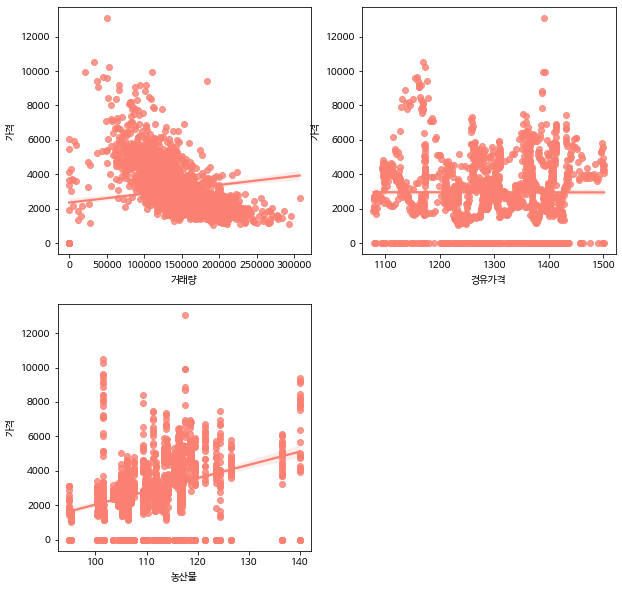


새송이


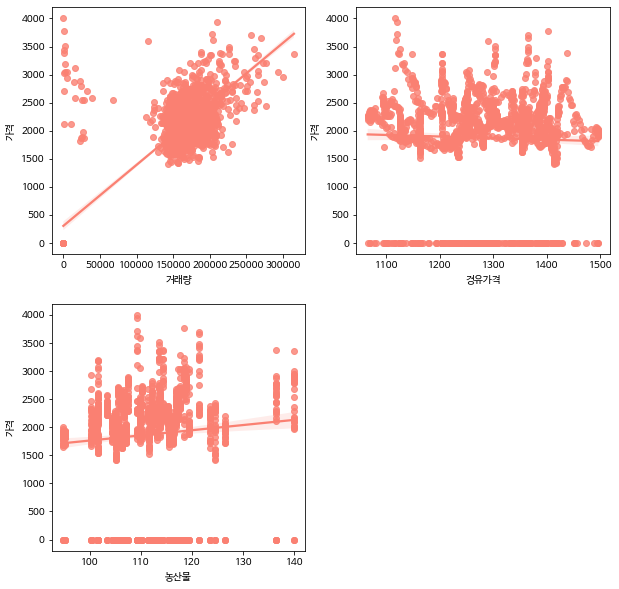


팽이버섯


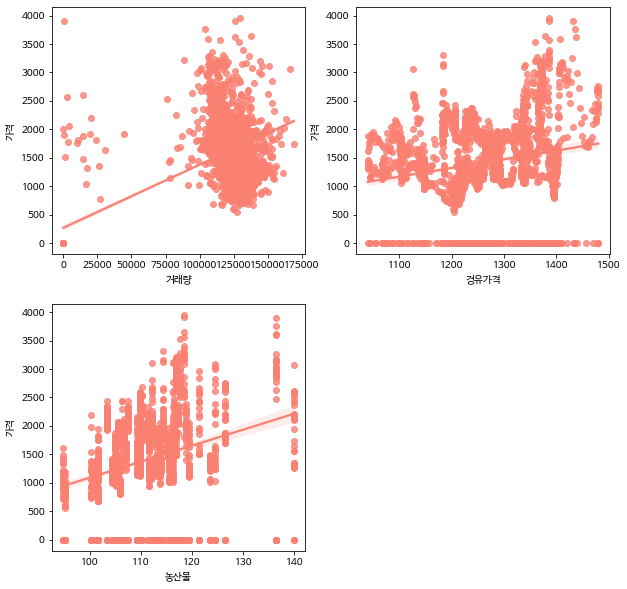


토마토


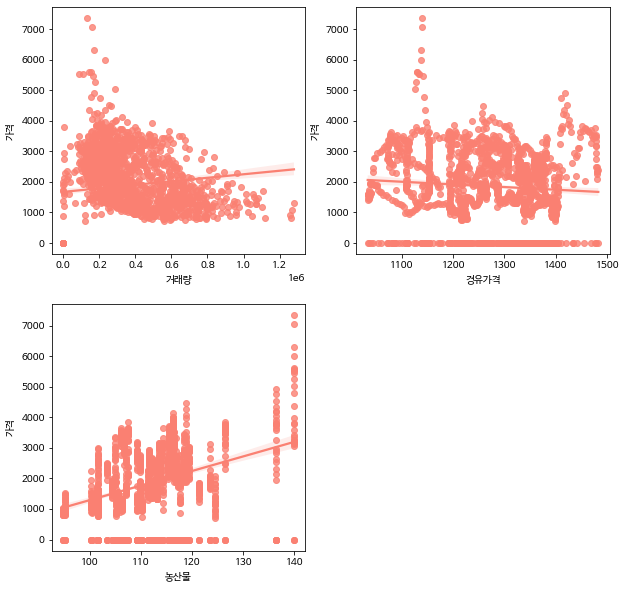


청상추



백다다기


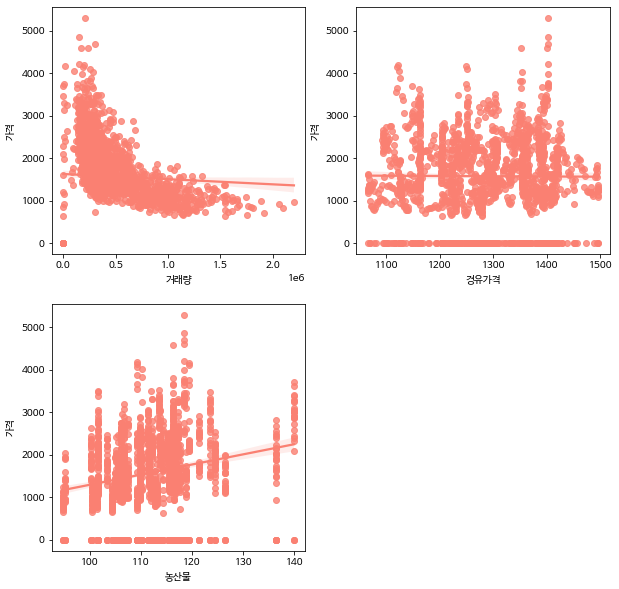


애호박


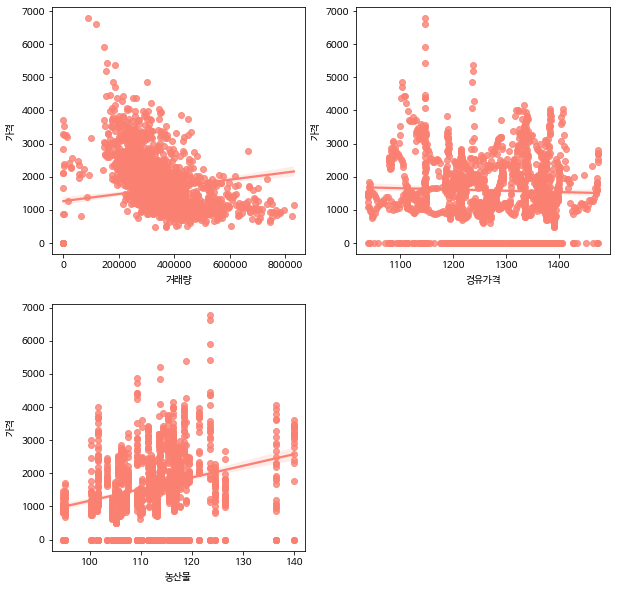


캠벨얼리



샤인마스캇


In [ ]:
# 품목별 regplot
for item in order:
    plot_cols = ['가격', '거래량', '경유가격', '농산물']
    plt.figure(figsize = (10, 10))
    print(item)
    for idx, col in enumerate(plot_cols[1:]):
        ax1 = plt.subplot(2, 2, idx + 1)
        sns.regplot(x = col, y = plot_cols[0], data = df2.query('품목 == "{}"'.format(item)), ax = ax1, color = 'salmon')
    plt.show()
    print()

## 시차를 고려한 상관계수

In [ ]:
for i in range(len(df['품목'].unique())):

    df_item = df2[df2['품목'] == df2['품목'].unique()[i]].reset_index(drop = True)
    df_item_pr = df_item['가격']

    # 품목의 가격과 거래량, 경유가격의 상관계수
    item_tr_cor = []
    item_oil_cor = []
    item_nong_cor = []


    for j in range(0, 90):  # 90일의 시차 고려
        df_diff = pd.concat([df_item[['거래량','경유가격', '농산물']], df_item_pr.iloc[j:].reset_index(drop = True)], axis = 1) 

        cor_trade = df_diff['가격'].corr(df_diff['거래량'])
        item_tr_cor.append(cor_trade)
        cor_oil = df_diff['가격'].corr(df_diff['경유가격'])
        item_oil_cor.append(cor_oil)
        cor_nong = df_diff['가격'].corr(df_diff['농산물'])
        item_nong_cor.append(cor_nong)

    result_df = pd.DataFrame({'trade' : item_tr_cor, '경유가격' : item_oil_cor, '농산물' : item_nong_cor})

    print()
    print('---------------- {} ----------------'.format(df2['품목'].unique()[i]))

    # 거래량 내림차순
    print('거래량')
    print(result_df.sort_values(by = 'trade', ascending = False))
    # 경유가격 내림차순
    print('경유가격')
    print(result_df.sort_values(by = '경유가격', ascending = False))
    # 농산물 내림차순
    print('농산물 가격 지수')
    print(result_df.sort_values(by = '농산물', ascending = False))



---------------- 배추 ----------------
거래량
       trade      경유가격       농산물
77  0.253484 -0.212947 -0.339587
0   0.252138 -0.208070  0.249507
84  0.249350 -0.220243 -0.331636
70  0.243906 -0.207487 -0.338394
63  0.227731 -0.203883 -0.326340
..       ...       ...       ...
27 -0.170670 -0.206182 -0.055467
41 -0.172673 -0.201995 -0.181647
13 -0.177183 -0.210151  0.127000
34 -0.177658 -0.202287 -0.125350
20 -0.180486 -0.208841  0.043272

[90 rows x 3 columns]
경유가격
       trade      경유가격       농산물
38 -0.096354 -0.199519 -0.160287
39 -0.100565 -0.200174 -0.169485
37 -0.100624 -0.200840 -0.151730
40 -0.112377 -0.200905 -0.176670
49  0.219760 -0.200926 -0.241408
..       ...       ...       ...
85  0.023208 -0.221579 -0.328352
86 -0.056503 -0.222768 -0.328438
87 -0.044356 -0.225302 -0.330258
88 -0.056699 -0.226368 -0.324767
89 -0.064798 -0.227362 -0.323586

[90 rows x 3 columns]
농산물 가격 지수
       trade      경유가격       농산물
0   0.252138 -0.208070  0.249507
1   0.027837 -0.209176  0.242749
2  -0.

- 시차 고려
- 양파 : 거래량 --> 0.41(84일)
- 얼갈이배추 : 거래량 --> 0.65(84일)
- 깻잎 : 거래량 --> 0.55(77일)
- 시금치 : 거래량 --> -0.41(6일)
- 파프리카 : 거래량 --> 0.55(84일)
- 청상추 : 거래량 --> 0.46(84일)
- 백다다기 : 거래량 --> -0.50(6일)
- 애호박 : 거래량 --> -0.47(6일)

* 시차를 고려해도 딱히 좋아지진 않았다,, 

# 거래량 분석

## 품목별 거래량 평균

In [ ]:
# 내림차순 정렬
mean_trade = df2.groupby(['품목'])['거래량'].mean().to_frame().sort_values(by = '거래량', ascending = False)
mean_trade

거래량
품목                 
양파     1.656628e+06
무      1.274344e+06
배추     1.113022e+06
대파     5.705150e+05
양배추    5.626202e+05
백다다기   4.234344e+05
토마토    3.190970e+05
애호박    3.024887e+05
당근     2.751360e+05
얼갈이배추  2.563302e+05
시금치    1.516904e+05
새송이    1.443486e+05
마늘     1.383455e+05
캠벨얼리   1.183558e+05
파프리카   1.165736e+05
팽이버섯   1.041714e+05
깻잎     8.019116e+04
미나리    7.043008e+04
청상추    3.470623e+04
샤인마스캇  6.690234e+03
건고추    3.578542e+03

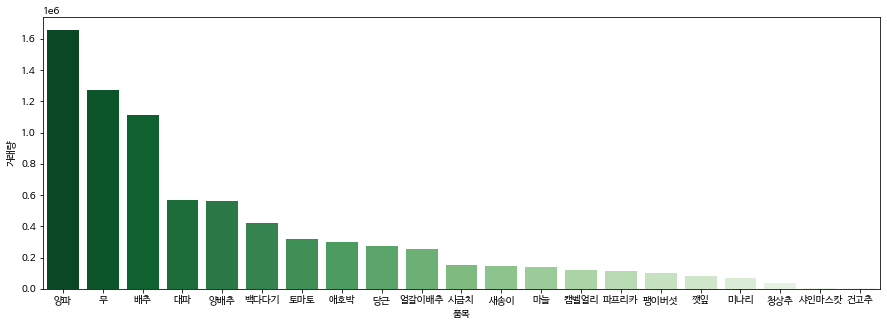

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data = mean_trade, x = mean_trade.index, y = '거래량', ci = None, palette = 'Greens_r')

* 거래량 : 양파 > 무 > 배추 ...

## 연도에 따른 각 품목별 거래량

In [ ]:
df2.groupby(['연도', '품목'])['거래량'].mean().unstack()

품목            건고추            깻잎  ...           파프리카           팽이버섯
연도                               ...                              
2016  2147.870765  80549.295902  ...  113280.211202  107917.628415
2017  8497.625205  84516.325479  ...  119784.679178  108985.497260
2018  3976.887945  78987.832877  ...  110625.073425  102353.758082
2019  1488.284658  79279.979726  ...  122237.718356   99253.944384
2020  1173.053676  76742.756618  ...  117078.102574  101708.128676

[5 rows x 21 columns]

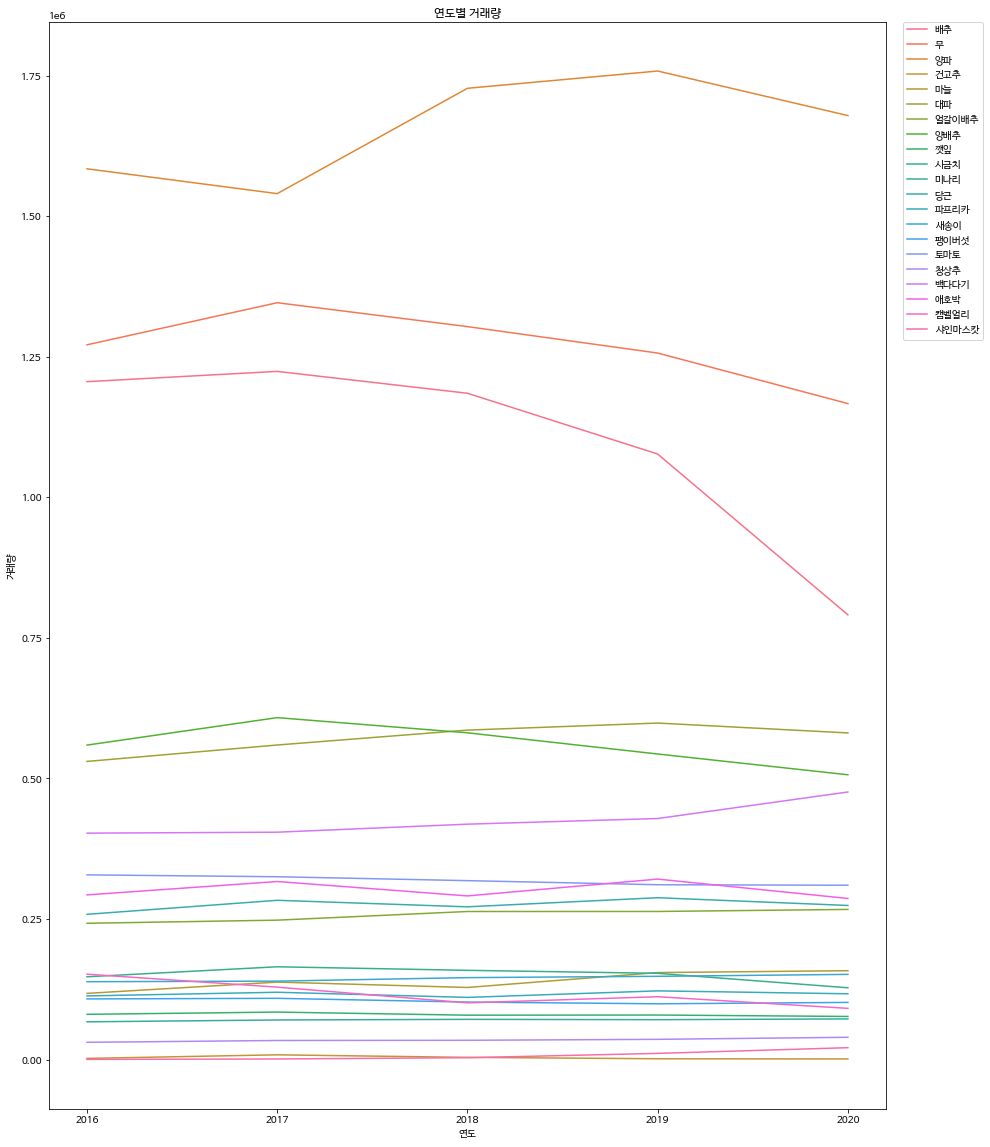

In [ ]:
plt.figure(figsize=(15, 20))
ax = sns.lineplot(data=df2, x="연도", y="거래량", hue="품목", ci = None)
ax.set_title('연도별 거래량')
ax.set_xticks([2016, 2017, 2018, 2019, 2020])
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
# 양파, 무, 배추 제거했을 때
plt.figure(figsize=(15, 20))
ax = sns.lineplot(data=df2.query('품목 != "배추" and 품목 != "무" and 품목 != "양파"'), x="연도", y="거래량", hue="품목", ci = None)
ax.set_title('연도별 거래량')
ax.set_xticks([2016, 2017, 2018, 2019, 2020])
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
order = df2['품목'].unique()
order

array(['배추', '무', '양파', '건고추', '마늘', '대파', '얼갈이배추', '양배추', '깻잎', '시금치',
       '미나리', '당근', '파프리카', '새송이', '팽이버섯', '토마토', '청상추', '백다다기', '애호박',
       '캠벨얼리', '샤인마스캇'], dtype=object)

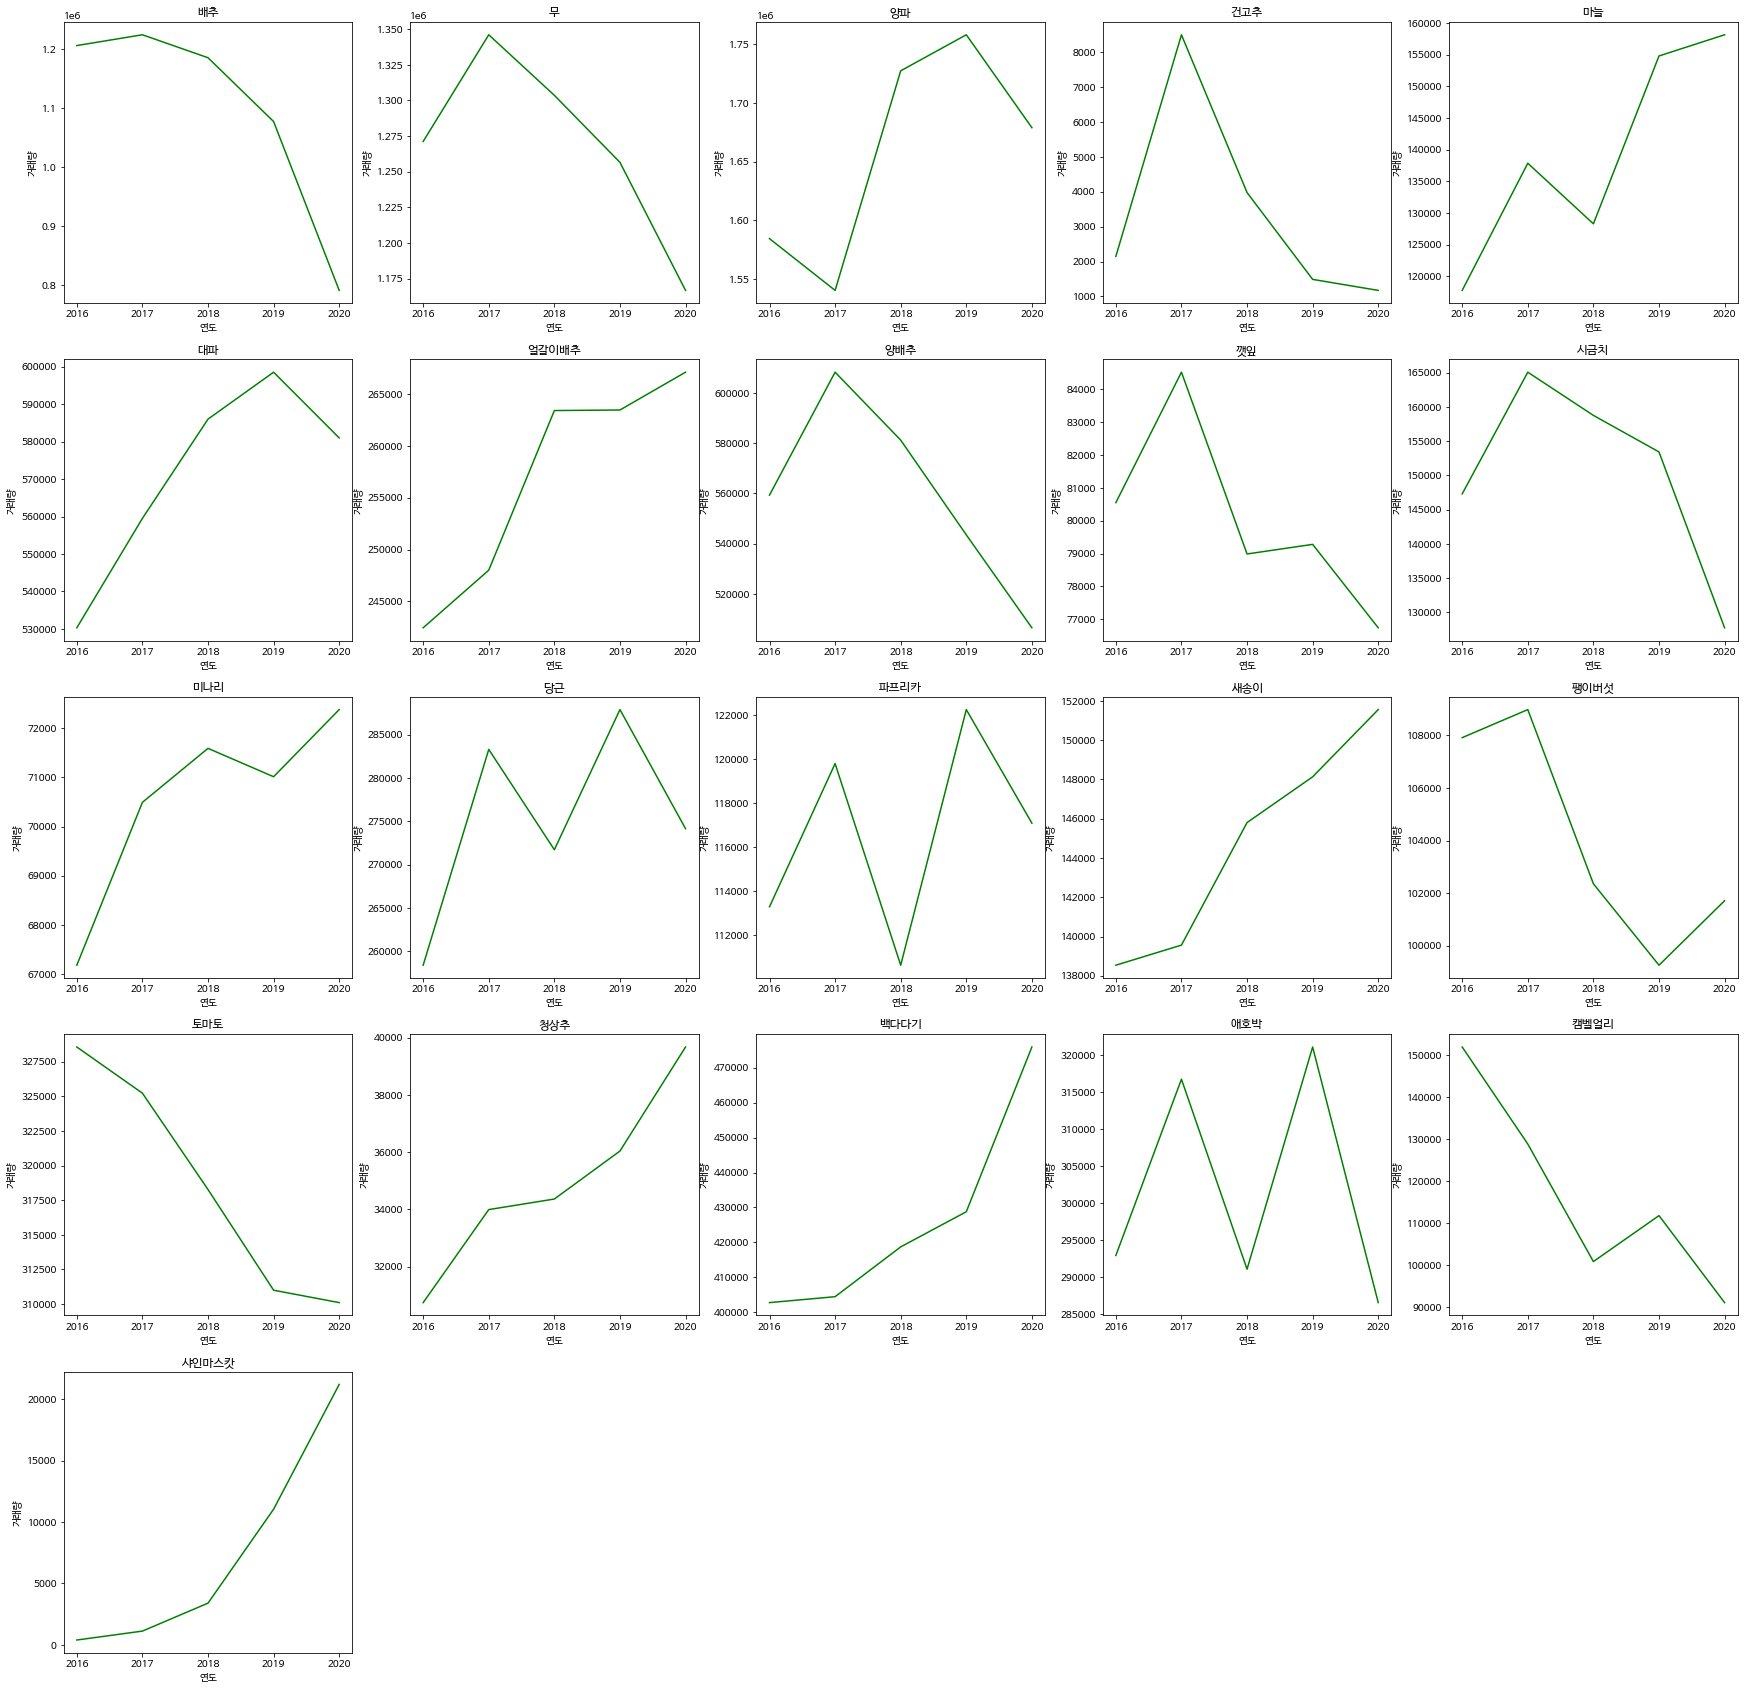

In [ ]:
fig = plt.figure(figsize = (30, 30))
# 하나씩 보기
for i, item in enumerate(order):
    ax1 = plt.subplot(5, 5, i+1)
    data = df2.query('품목 == "{}"'.format(item))
    ax = sns.lineplot(data = data, x = '연도', y = '거래량', ci = None, color = 'g', ax = ax1)
    ax.set_title(item)
    ax.set_xticks([2016, 2017, 2018, 2019, 2020])
plt.show()

 ** 연도별 거래량 
- 배추 : 감소
- 무 : 2017까지 증가하다가 이후 감소
- 건고추 : 2017에 최고점 찍고 감소
- 마늘 : 2018년에 주춤하다가 증가
- 대파 : 2019년까지 증가하다가 2020년에 감소
- 얼갈이배추 : 증가
- 양배추 :  2017 최고점 찍고 감소
- 깻잎 : 2017년 이후로 감소
- 시금치 : 2017년까지 증가하다가 감소
- 미나리 : 증가
- 당근 : M자 모양
- 파프리카 : M자모양
- 새송이 : 증가
- 팽이버섯 : 감소하다가 2019년부터 증가
- 토마토 : 감소
- 청상추 : 증가
-  백다다기 : 증가
- 애호박 : M자 모양
- 캠벨얼리 : 감소
- 샤인마스캇 : 엄청난 증가


## 월별 거래량

In [ ]:
df2.groupby(['월'])['거래량'].mean().to_frame()

거래량
월                
1   296944.439447
2   306124.255265
3   342234.680399
4   395832.709810
5   438528.323318
6   441319.502889
7   328084.249247
8   339390.652381
9   384213.502574
10  353115.326767
11  458036.338810
12  339890.229570

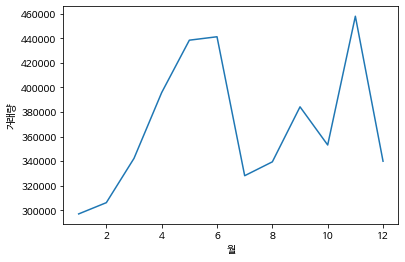

In [ ]:
sns.lineplot(data = df2, x = '월', y = '거래량', ci = None)

* 6월과 11월에 거래량이 많다

## 월에 따른 각 품목별 거래량

In [ ]:
df2.groupby(['월', '품목'])['거래량'].mean().unstack()

품목           건고추             깻잎  ...           파프리카           팽이버섯
월                                ...                              
1    1141.196774   57186.289032  ...   73985.645161  100932.085161
2    1622.623944   69529.878873  ...   84192.224648  102495.642254
3     834.305161   78466.551613  ...  103843.010323  109842.626452
4     980.784667   82756.715333  ...  125508.626000  110439.836000
5     910.726452   90434.905806  ...  143883.949677  110957.860000
6     738.427333  102489.306667  ...  163910.564667  104372.568000
7     884.043226   93911.443226  ...  161872.590323  102734.185161
8    4371.430968   83981.660645  ...  106139.853548  102441.628387
9    3858.743243   80122.956757  ...   92802.502703   97854.243919
10   5242.268548   83513.630645  ...   99142.116935   97869.448387
11  19132.834167   73131.532500  ...  126504.732500  102688.771667
12   7534.506452   62132.523387  ...  113206.533871  105976.186290

[12 rows x 21 columns]

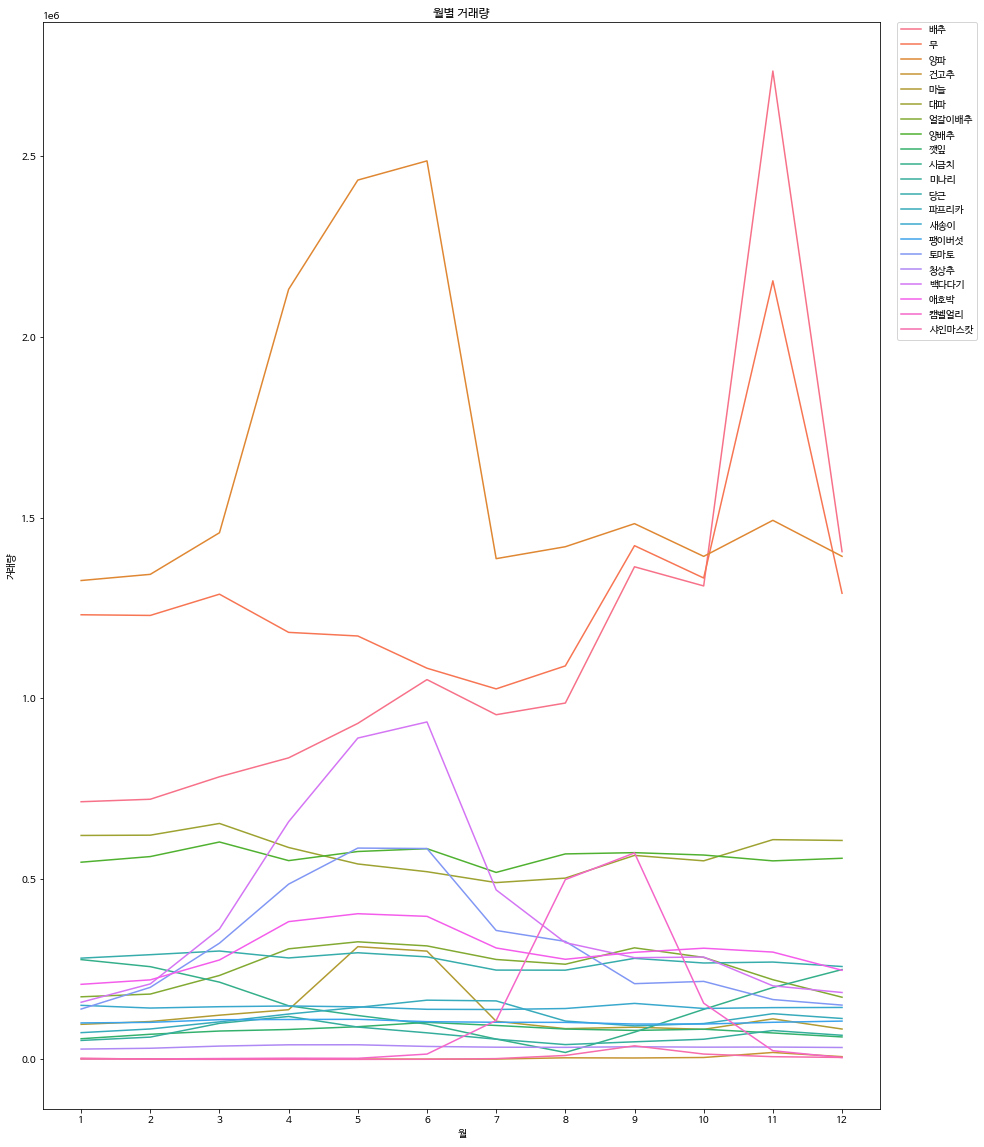

In [ ]:
plt.figure(figsize=(15, 20))
ax = sns.lineplot(data=df2, x="월", y="거래량", hue="품목", ci = None)
ax.set_title('월별 거래량')
ax.set_xticks(df2['월'].unique())
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

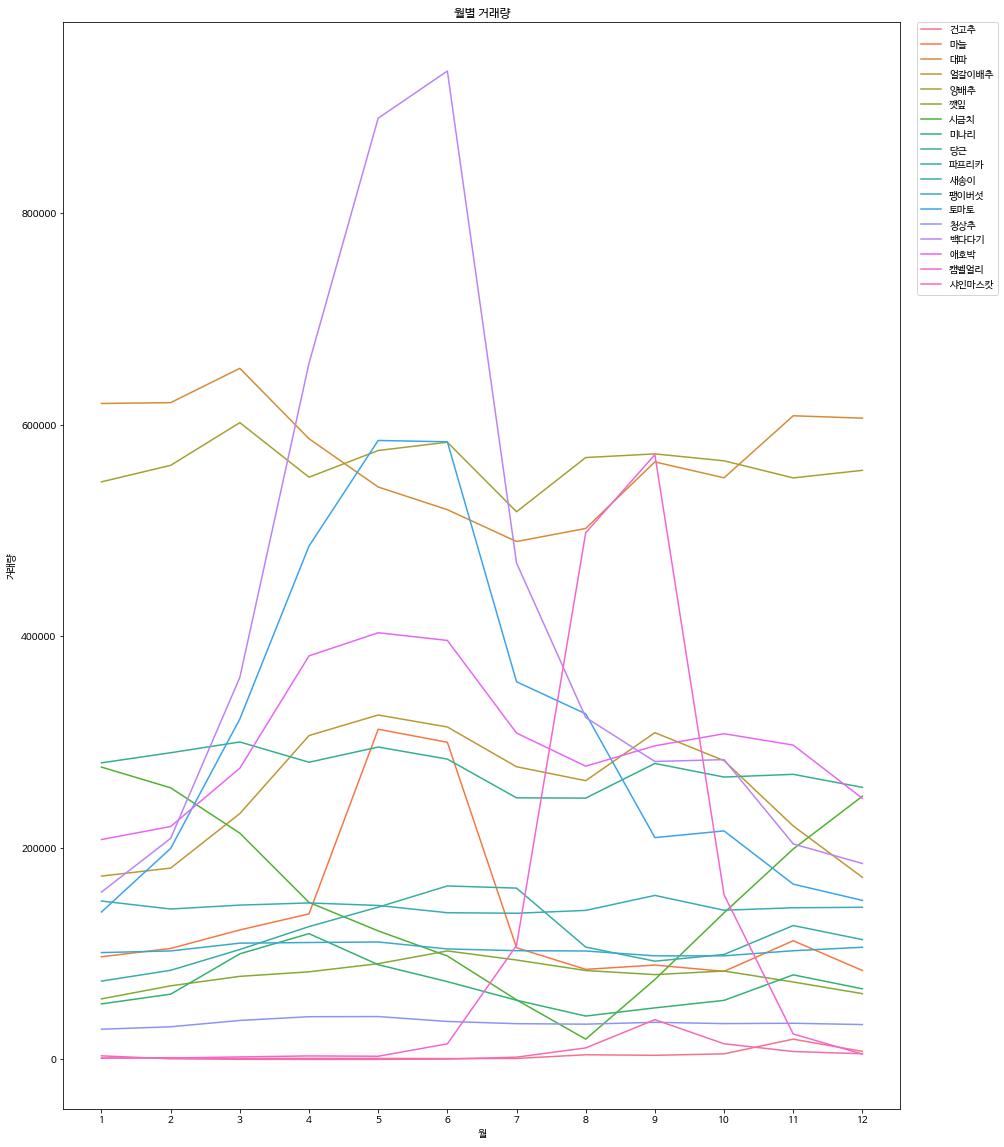

In [ ]:
# 배추, 양파 제거했을 때
plt.figure(figsize=(15, 20))
ax = sns.lineplot(data=df2.query('품목 != "배추"  and 품목 != "무" and 품목 != "양파"'), x="월", y="거래량", hue="품목", ci = None)
ax.set_title('월별 거래량')
ax.set_xticks(df2['월'].unique())
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

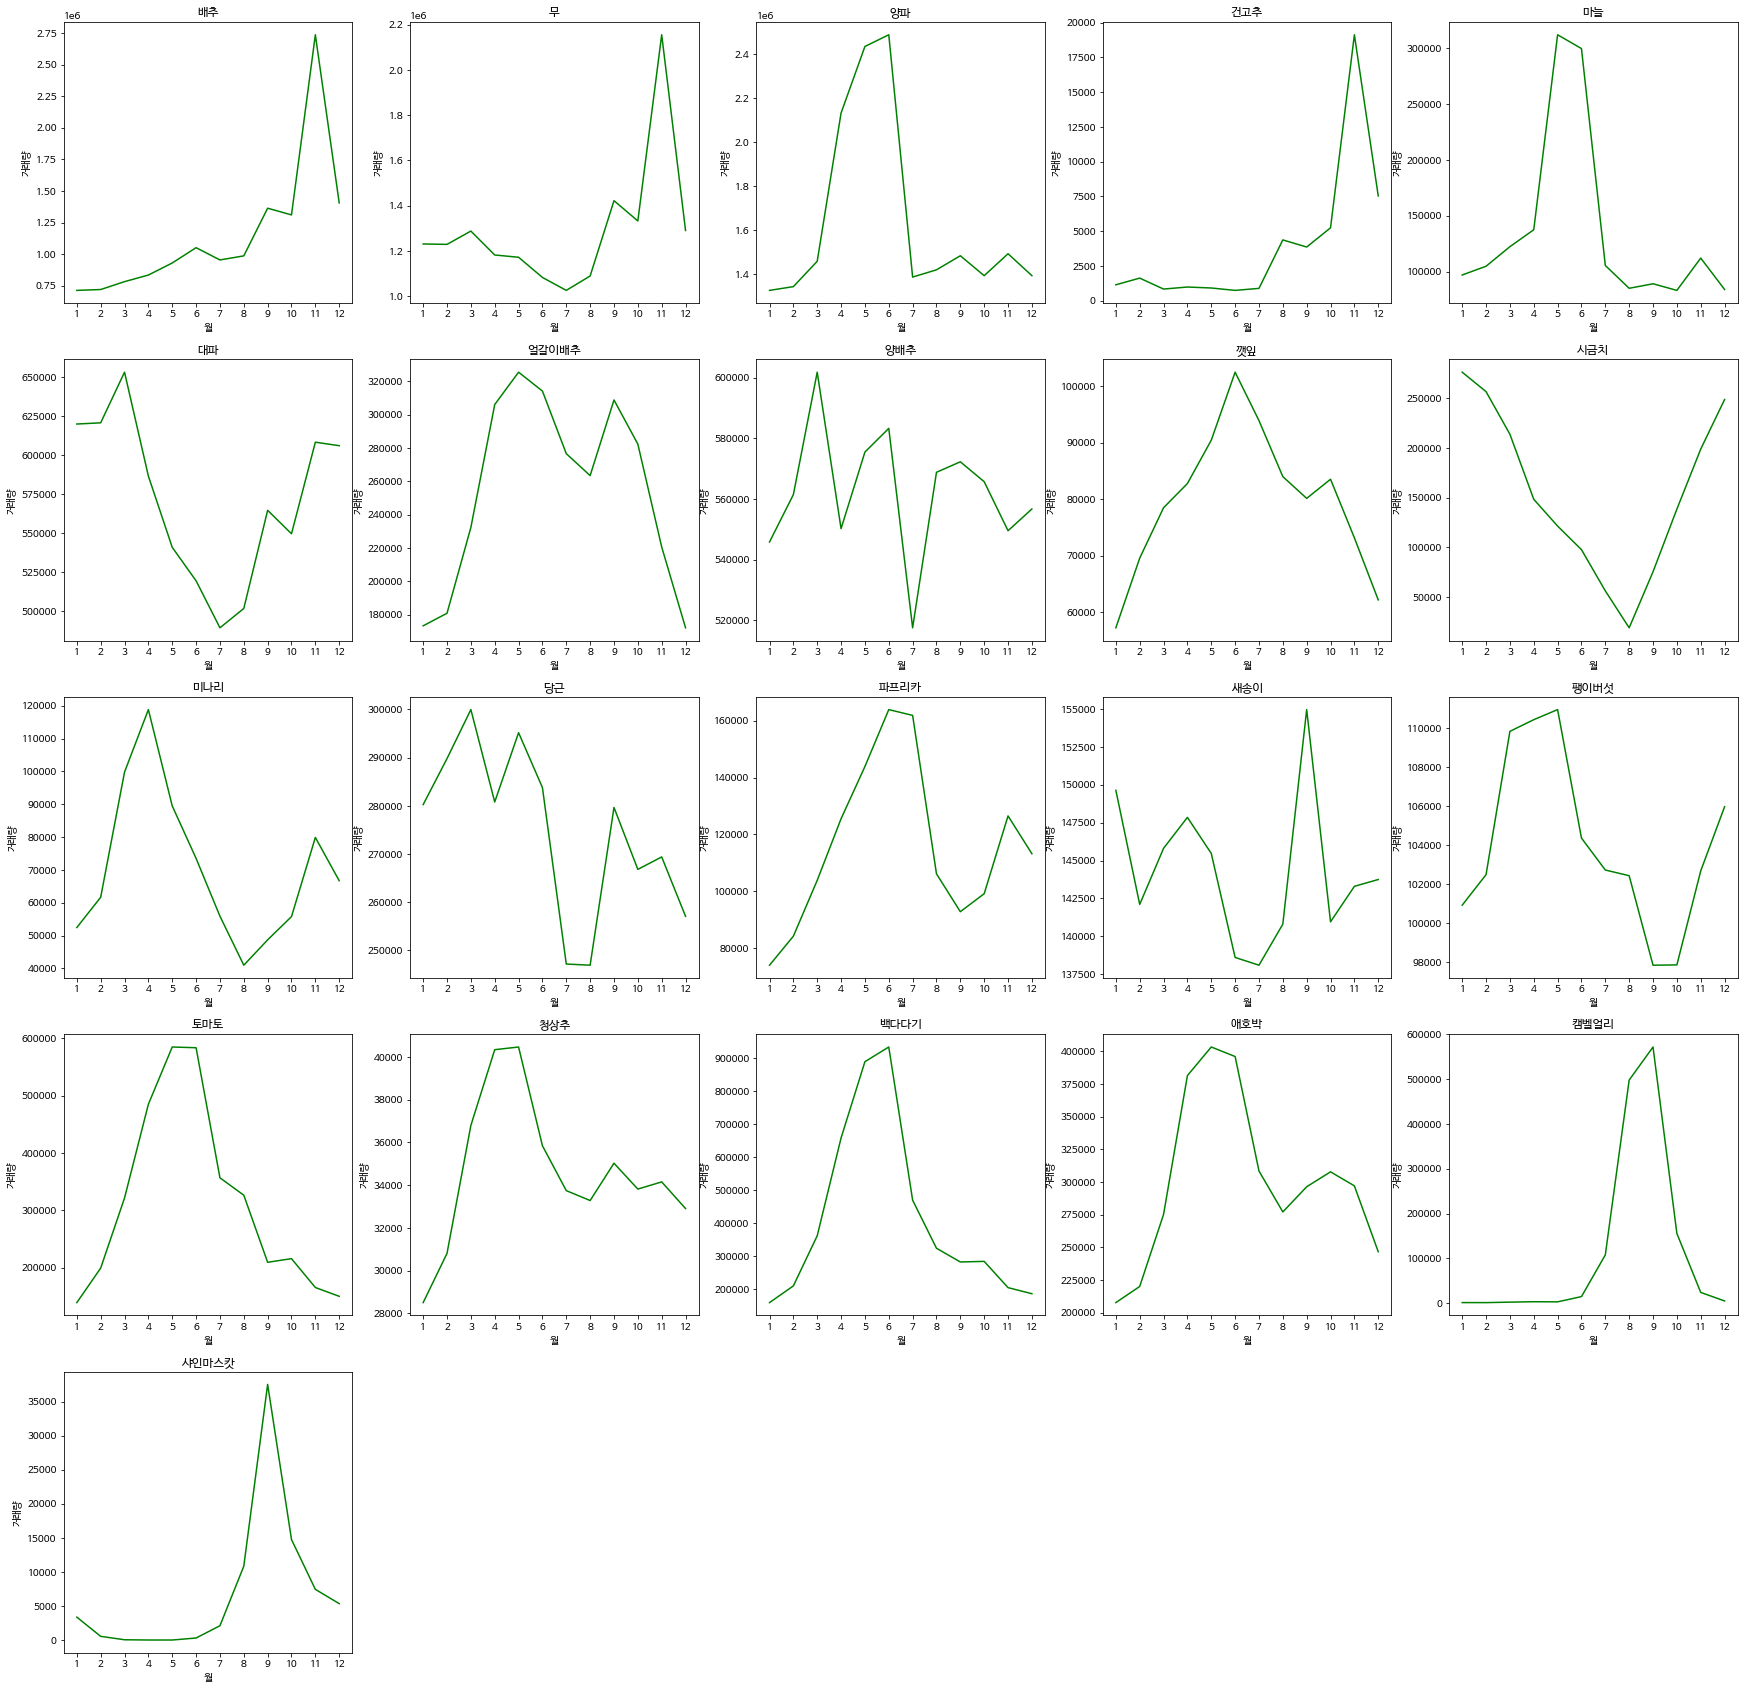

In [ ]:
fig = plt.figure(figsize = (30, 30))
for i, item in enumerate(order):
    ax1 = plt.subplot(5, 5, i+1)
    data = df2.query('품목 == "{}"'.format(item))
    ax = sns.lineplot(data = data, x = '월', y = '거래량', ci = None, color = 'g', ax = ax1)
    ax.set_title(item)
    ax.set_xticks(df2['월'].unique())
plt.show()

* 재배시기에 따른 거래량 차이..?

## 요일별 거래량

In [ ]:
df2.groupby(['요일'])['거래량'].mean().to_frame()

거래량
요일                
금요일  424749.747408
목요일  417761.085888
수요일  429041.033526
월요일  509171.869086
일요일     753.503149
토요일  359125.789190
화요일  434346.715520

In [ ]:
day = '월요일 화요일 수요일 목요일 금요일 토요일 일요일'
day_order = day.split(' ')

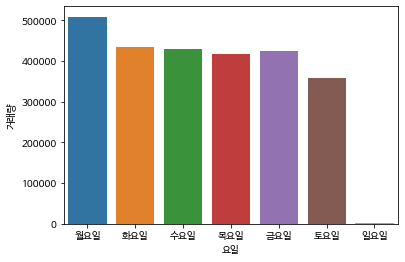

In [ ]:
sns.barplot(data = df2, x = '요일', y = '거래량', order = day_order, ci = None)

* 월요일이 가장 거래가 많다.

## 요일에 따른 각 품목별 거래량

In [ ]:
df2.groupby(['요일', '품목'])['거래량'].mean().unstack()

품목            건고추             깻잎  ...           파프리카           팽이버섯
요일                                ...                              
금요일   3901.031855   89065.020161  ...  143694.981452  121534.553226
목요일   2316.580162   85644.559919  ...  135402.676923  122073.258704
수요일  13670.577328   89159.583806  ...  142525.148178  120106.610121
월요일   1705.870968  121334.658871  ...  159462.618145  126303.996371
일요일      2.570161     120.845161  ...      45.789113     192.951613
토요일   1136.272984   89760.791532  ...  116371.830645  116167.928226
화요일   2347.528745   86335.597976  ...  118701.623077  123032.772470

[7 rows x 21 columns]

In [ ]:
df_group2 = pd.DataFrame(df2.groupby(['요일', '품목'])['거래량'].mean())
df_group2 = df_group2.reset_index()
df_group2 = pd.concat([df_group2.query('요일 == "월요일"'), df_group2.query('요일 == "화요일"'), df_group2.query('요일 == "수요일"'), df_group2.query('요일 == "목요일"'), df_group2.query('요일 == "금요일"'), df_group2.query('요일 == "토요일"'),df_group2.query('요일 == "일요일"')], axis = 0)

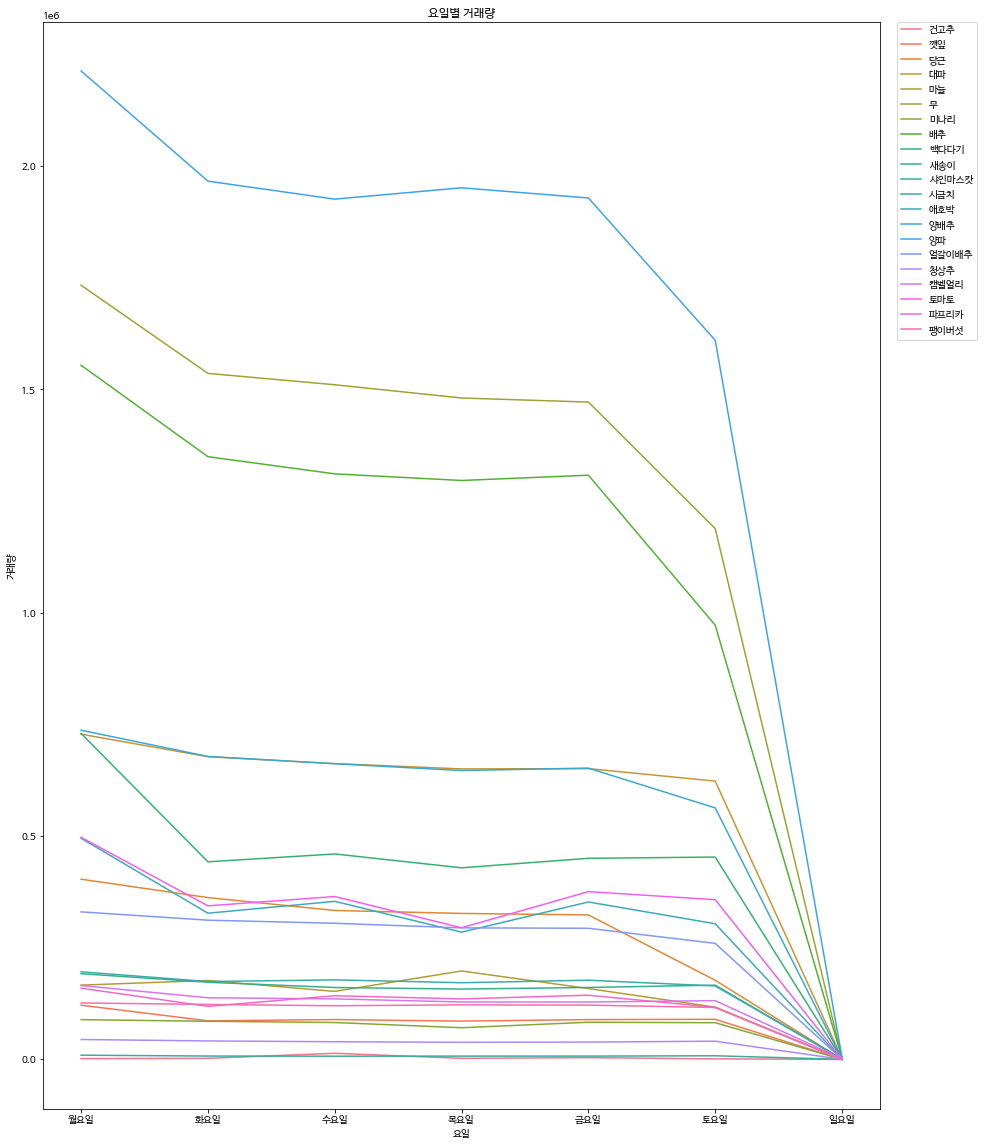

In [ ]:
plt.figure(figsize=(15, 20))
ax = sns.lineplot(data=df_group2, x="요일", y="거래량", hue="품목", ci = None)
ax.set_title('요일별 거래량')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

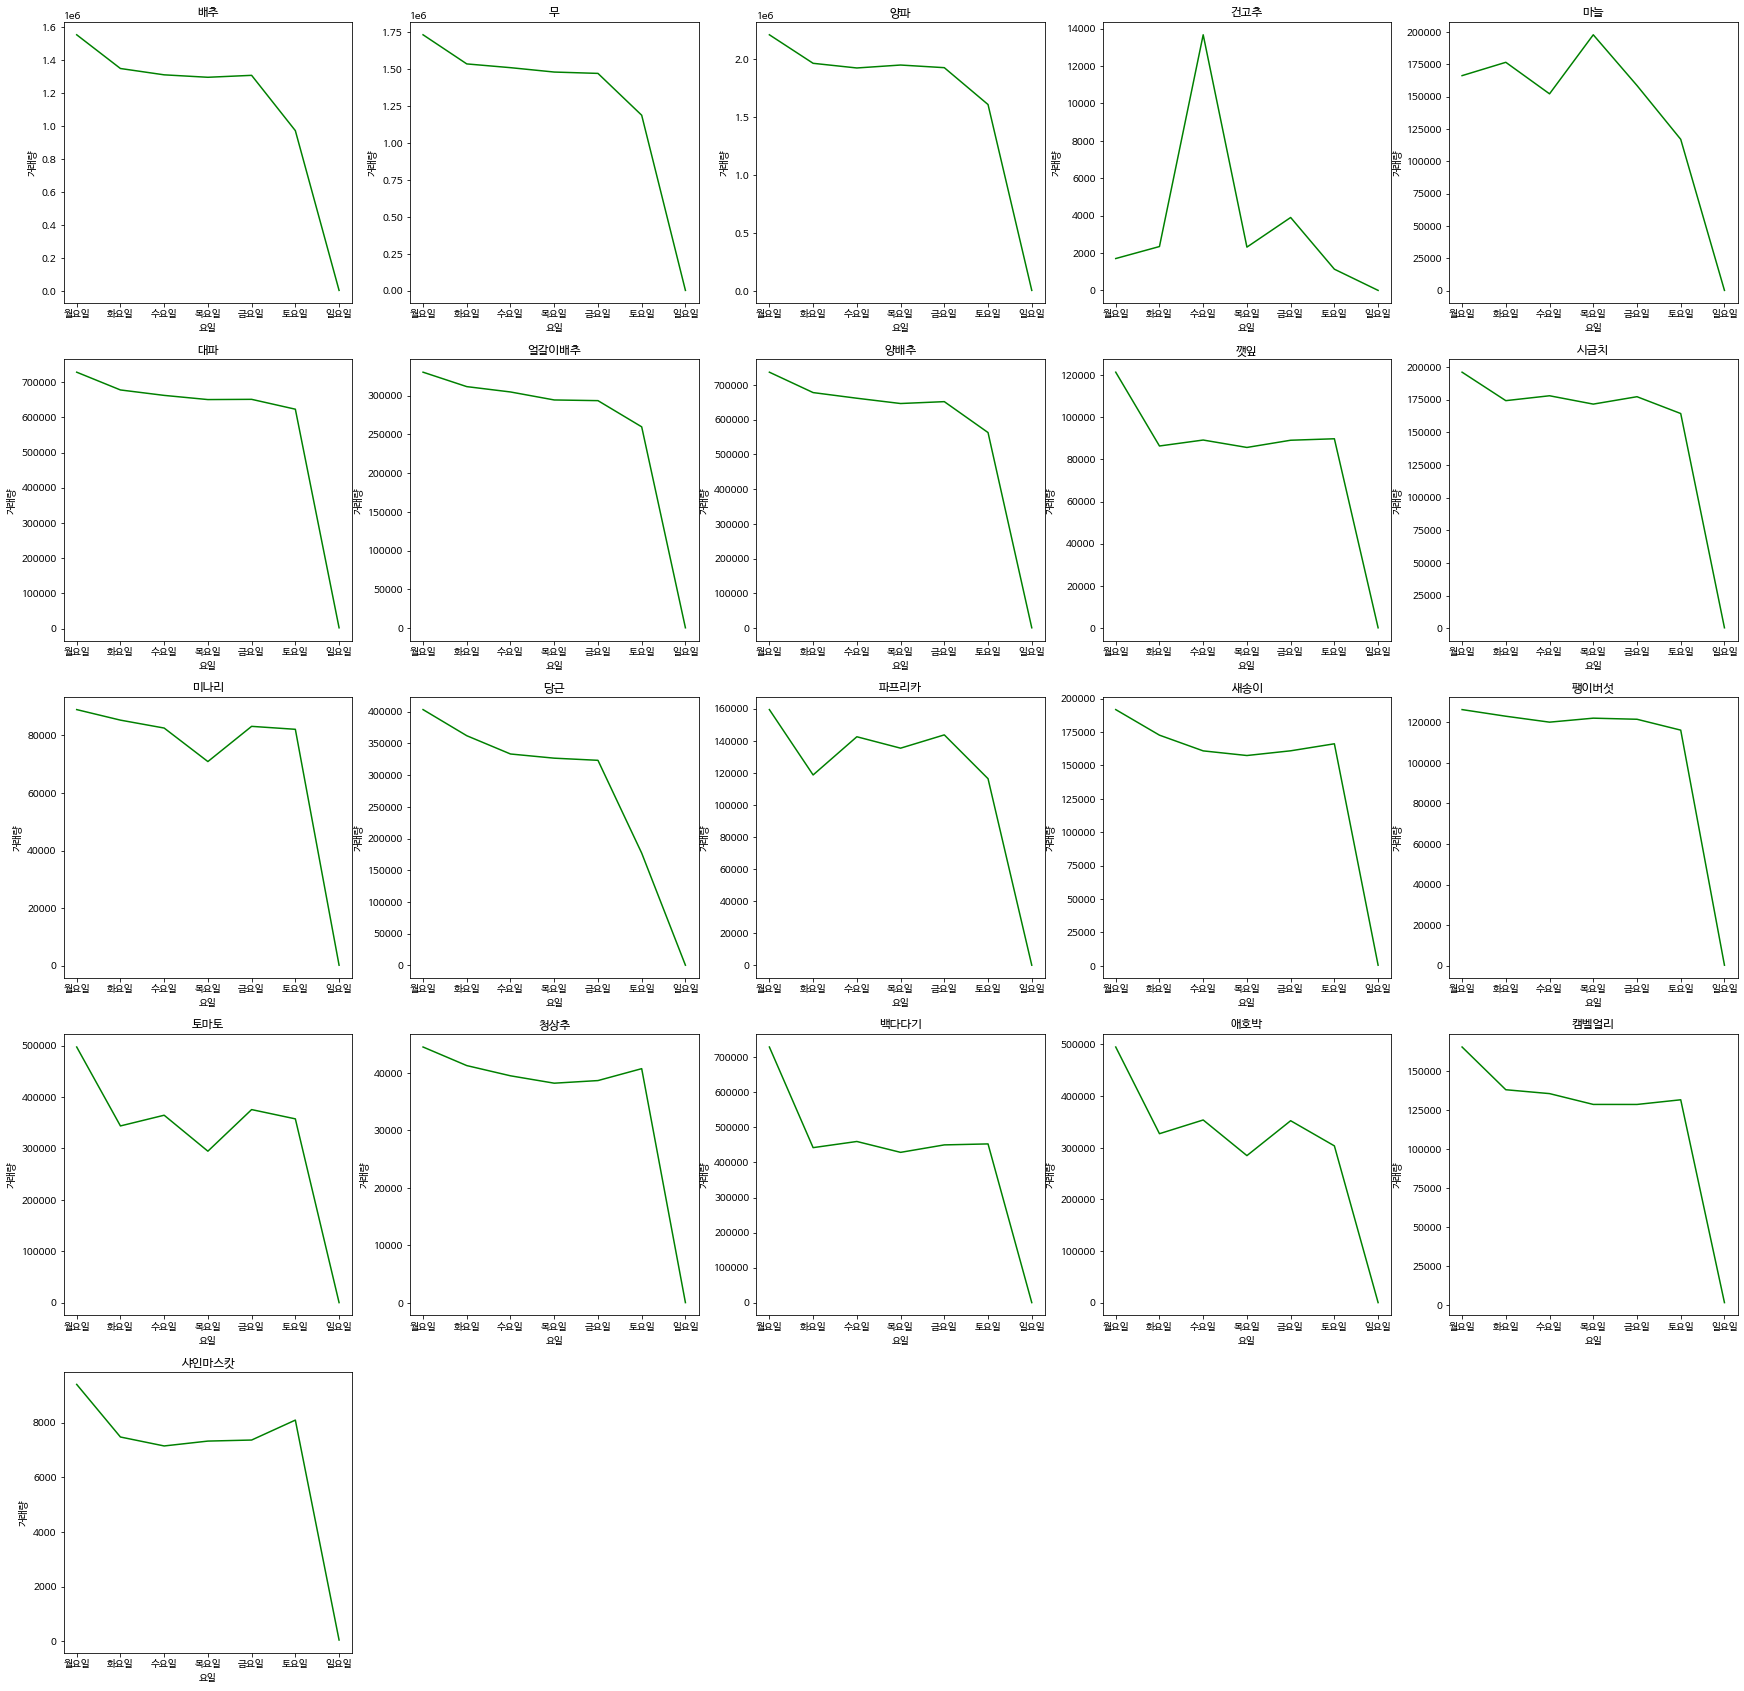

In [ ]:
fig = plt.figure(figsize = (30, 30))
for i, item in enumerate(order):
    ax1 = plt.subplot(5, 5, i+1)
    data = df_group2.query('품목 == "{}"'.format(item))
    ax = sns.lineplot(data = data, x = '요일', y = '거래량', ci = None, color = 'g', ax = ax1)
    ax.set_title(item)
plt.show()

* 건고추는 왜 수요일에 거래량이 저렇게 많지?

In [ ]:
df_gungochu.groupby('요일')['거래량'].mean()

요일
금요일     3901.031855
목요일     2316.580162
수요일    13670.577328
월요일     1705.870968
일요일        2.570161
토요일     1136.272984
화요일     2347.528745
Name: 거래량, dtype: float64

In [ ]:
# 건고추 거래량 상위 20개 index
gungochu_idx = pd.DataFrame(df_gungochu['거래량'].sort_values(ascending = False)).head(20).index
gungochu_idx

Int64Index([5904, 5864, 5869, 5897, 5911, 5876, 6254, 5883, 6247, 6261, 5890,
            6158, 5918, 6164, 5834, 5968, 5455, 5953, 5965, 5960],
           dtype='int64')

In [ ]:
df2.loc[gungochu_idx, :] 

date    연도   월   일   품목  ...   요일       가격       거래량     경유가격     농산물
5904  2017-12-06  2017  12   6  건고추  ...  수요일  12450.0  413656.0  1315.08  105.58
5864  2017-10-27  2017  10  27  건고추  ...  금요일  11125.0  393691.8  1283.41  109.84
5869  2017-11-01  2017  11   1  건고추  ...  수요일  11746.0  392564.0  1285.66  101.54
5897  2017-11-29  2017  11  29  건고추  ...  수요일  12072.0  364816.2  1308.61  101.54
5911  2017-12-13  2017  12  13  건고추  ...  수요일  12613.0  251353.1  1318.67  105.58
5876  2017-11-08  2017  11   8  건고추  ...  수요일  12795.0  248406.0  1289.96  101.54
6254  2018-11-21  2018  11  21  건고추  ...  수요일  13274.0  248068.6  1399.82  116.52
5883  2017-11-15  2017  11  15  건고추  ...  수요일  11955.0  235487.6  1295.80  101.54
6247  2018-11-14  2018  11  14  건고추  ...  수요일   8847.0  221192.8  1412.33  116.52
6261  2018-11-28  2018  11  28  건고추  ...  수요일  13908.0  191853.6  1384.49  116.52
5890  2017-11-22  2017  11  22  건고추  ...  수요일  12529.0  164386.1  1302.11  101.54
6158  2018-08-17  2018   8  17  건고추  ...  금요일   1027.0  114821.8  1411.81  124.42
5918  2017-12-20  2017  12  20  건고추  ...  수요일  12404.0  111023.5  1320.58  105.58
6164  2018-08-23  2018   8  23  건고추  ...  목요일   1016.0   97900.0  1412.41  124.42
5834  2017-09-27  2017   9  27  건고추  ...  수요일   9621.0   74318.2  1266.17  118.76
5968  2018-02-08  2018   2   8  건고추  ...  목요일  12373.0   61656.7  1349.05  121.47
5455  2016-09-13  2016   9  13  건고추  ...  화요일   1209.0   56661.4  1192.08  114.25
5953  2018-01-24  2018   1  24  건고추  ...  수요일   7770.0   38097.0  1336.04  111.31
5965  2018-02-05  2018   2   5  건고추  ...  월요일     21.0   30010.5  1346.52  121.47
5960  2018-01-31  2018   1  31  건고추  ...  수요일   8054.0   27388.0  1342.40  111.31

[20 rows x 11 columns]

* 건고추는 2017년 수요일에 가장 많은 양의 거래가 이루어졌고, 따라서 수요일과 2017년도에 특히 거래량이 많다.

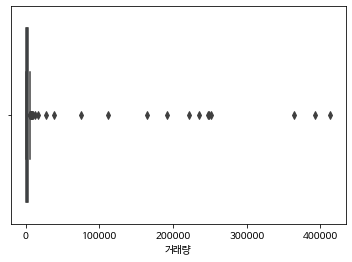

In [ ]:
sns.boxplot(x = df_gungochu[df_gungochu['요일'] == '수요일']['거래량'])

# 가격 분석

## 각 품목의 가격 평균

In [ ]:
# 내림차순 정렬
mean_price = df2.groupby(['품목'])['가격'].mean().to_frame().sort_values(by = '가격', ascending = False)
mean_price

가격
품목                
건고추    9537.642239
샤인마스캇  6989.684939
깻잎     4614.092902
마늘     3433.506636
캠벨얼리   3214.508944
파프리카   2951.681477
청상추    2740.142527
시금치    2364.220427
미나리    2133.585113
새송이    1873.084824
토마토    1858.428736
애호박    1590.833814
백다다기   1576.184074
팽이버섯   1424.464512
대파     1160.815926
당근      914.132718
얼갈이배추   902.145413
양파      652.812464
배추      597.120600
양배추     524.885747
무       490.738604

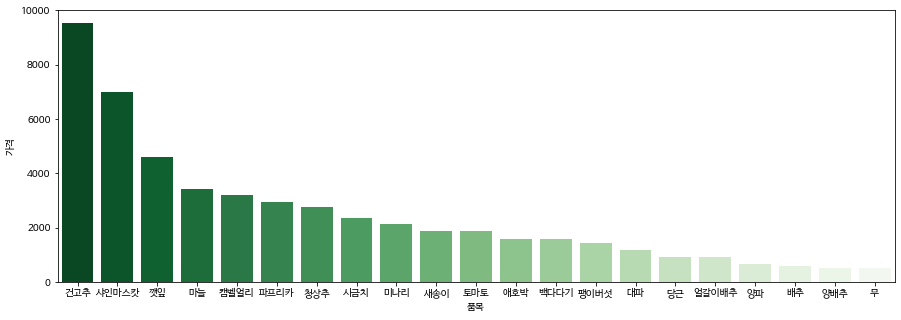

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data = mean_price, x = mean_price.index, y = '가격', ci = None, palette = 'Greens_r')

* 가격 : 건고추 > 샤인머스켓 > 깻잎 ...

## 연도에 따른 각 품목별 가격

In [ ]:
df2.groupby(['연도', '품목'])['가격'].mean().unstack()

품목             건고추           깻잎  ...         파프리카         팽이버섯
연도                               ...                          
2016   6106.185792  4412.571038  ...  2896.808743  1323.576503
2017   8502.783562  4026.821918  ...  2635.049315  1181.164384
2018   9824.432877  4681.410959  ...  3044.361644  1475.920548
2019  10593.317808  4574.663014  ...  2833.627397  1688.791781
2020  13742.187500  5635.900735  ...  3484.459559  1462.952206

[5 rows x 21 columns]

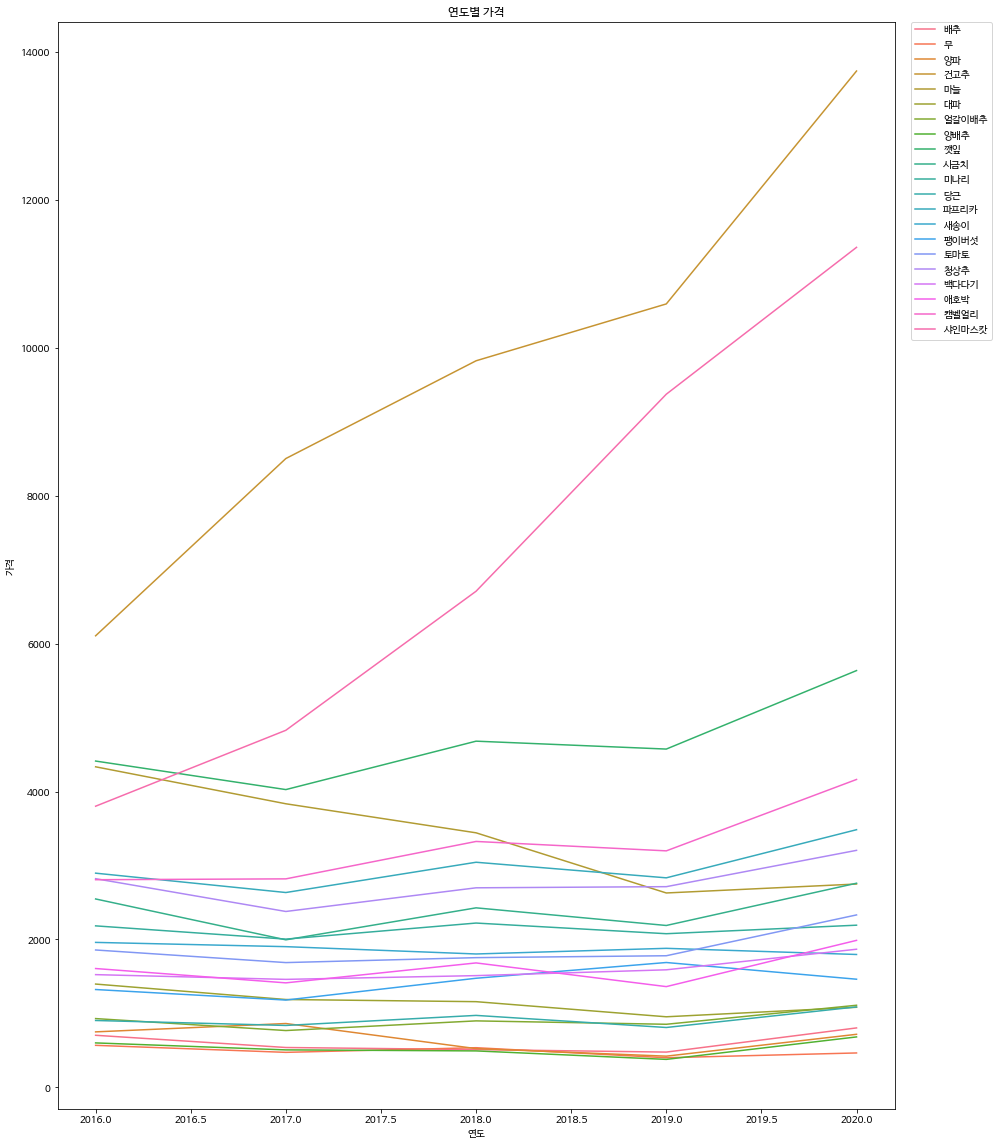

In [ ]:
plt.figure(figsize=(15, 20))
ax = sns.lineplot(data=df2, x="연도", y="가격", hue="품목", ci = None)
ax.set_title('연도별 가격')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

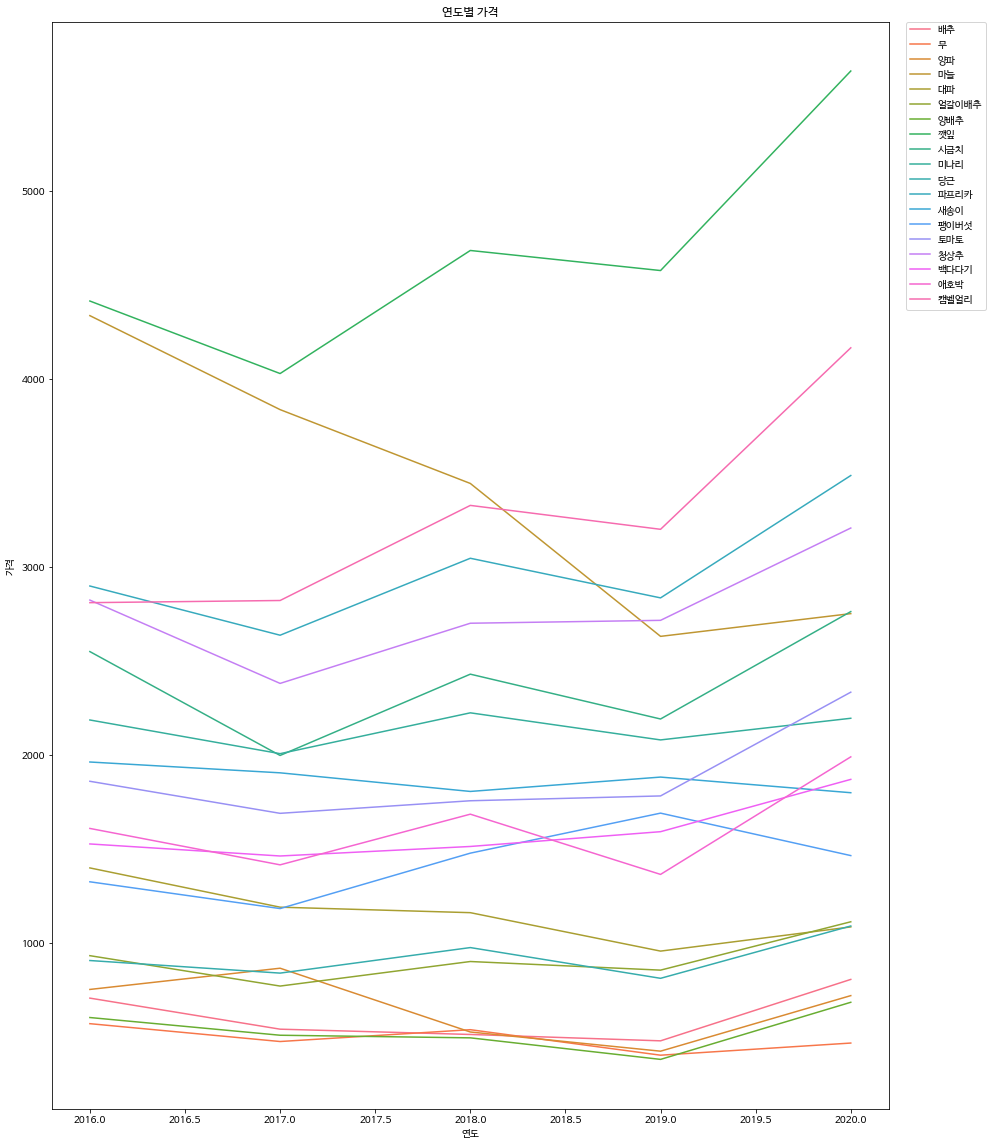

In [ ]:
# 건고추, 샤인머스켓 제거했을 때
plt.figure(figsize=(15, 20))
ax = sns.lineplot(data=df2.query('품목 != "건고추" and 품목 != "샤인마스캇"'), x="연도", y="가격", hue="품목", ci = None)
ax.set_title('연도별 가격')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

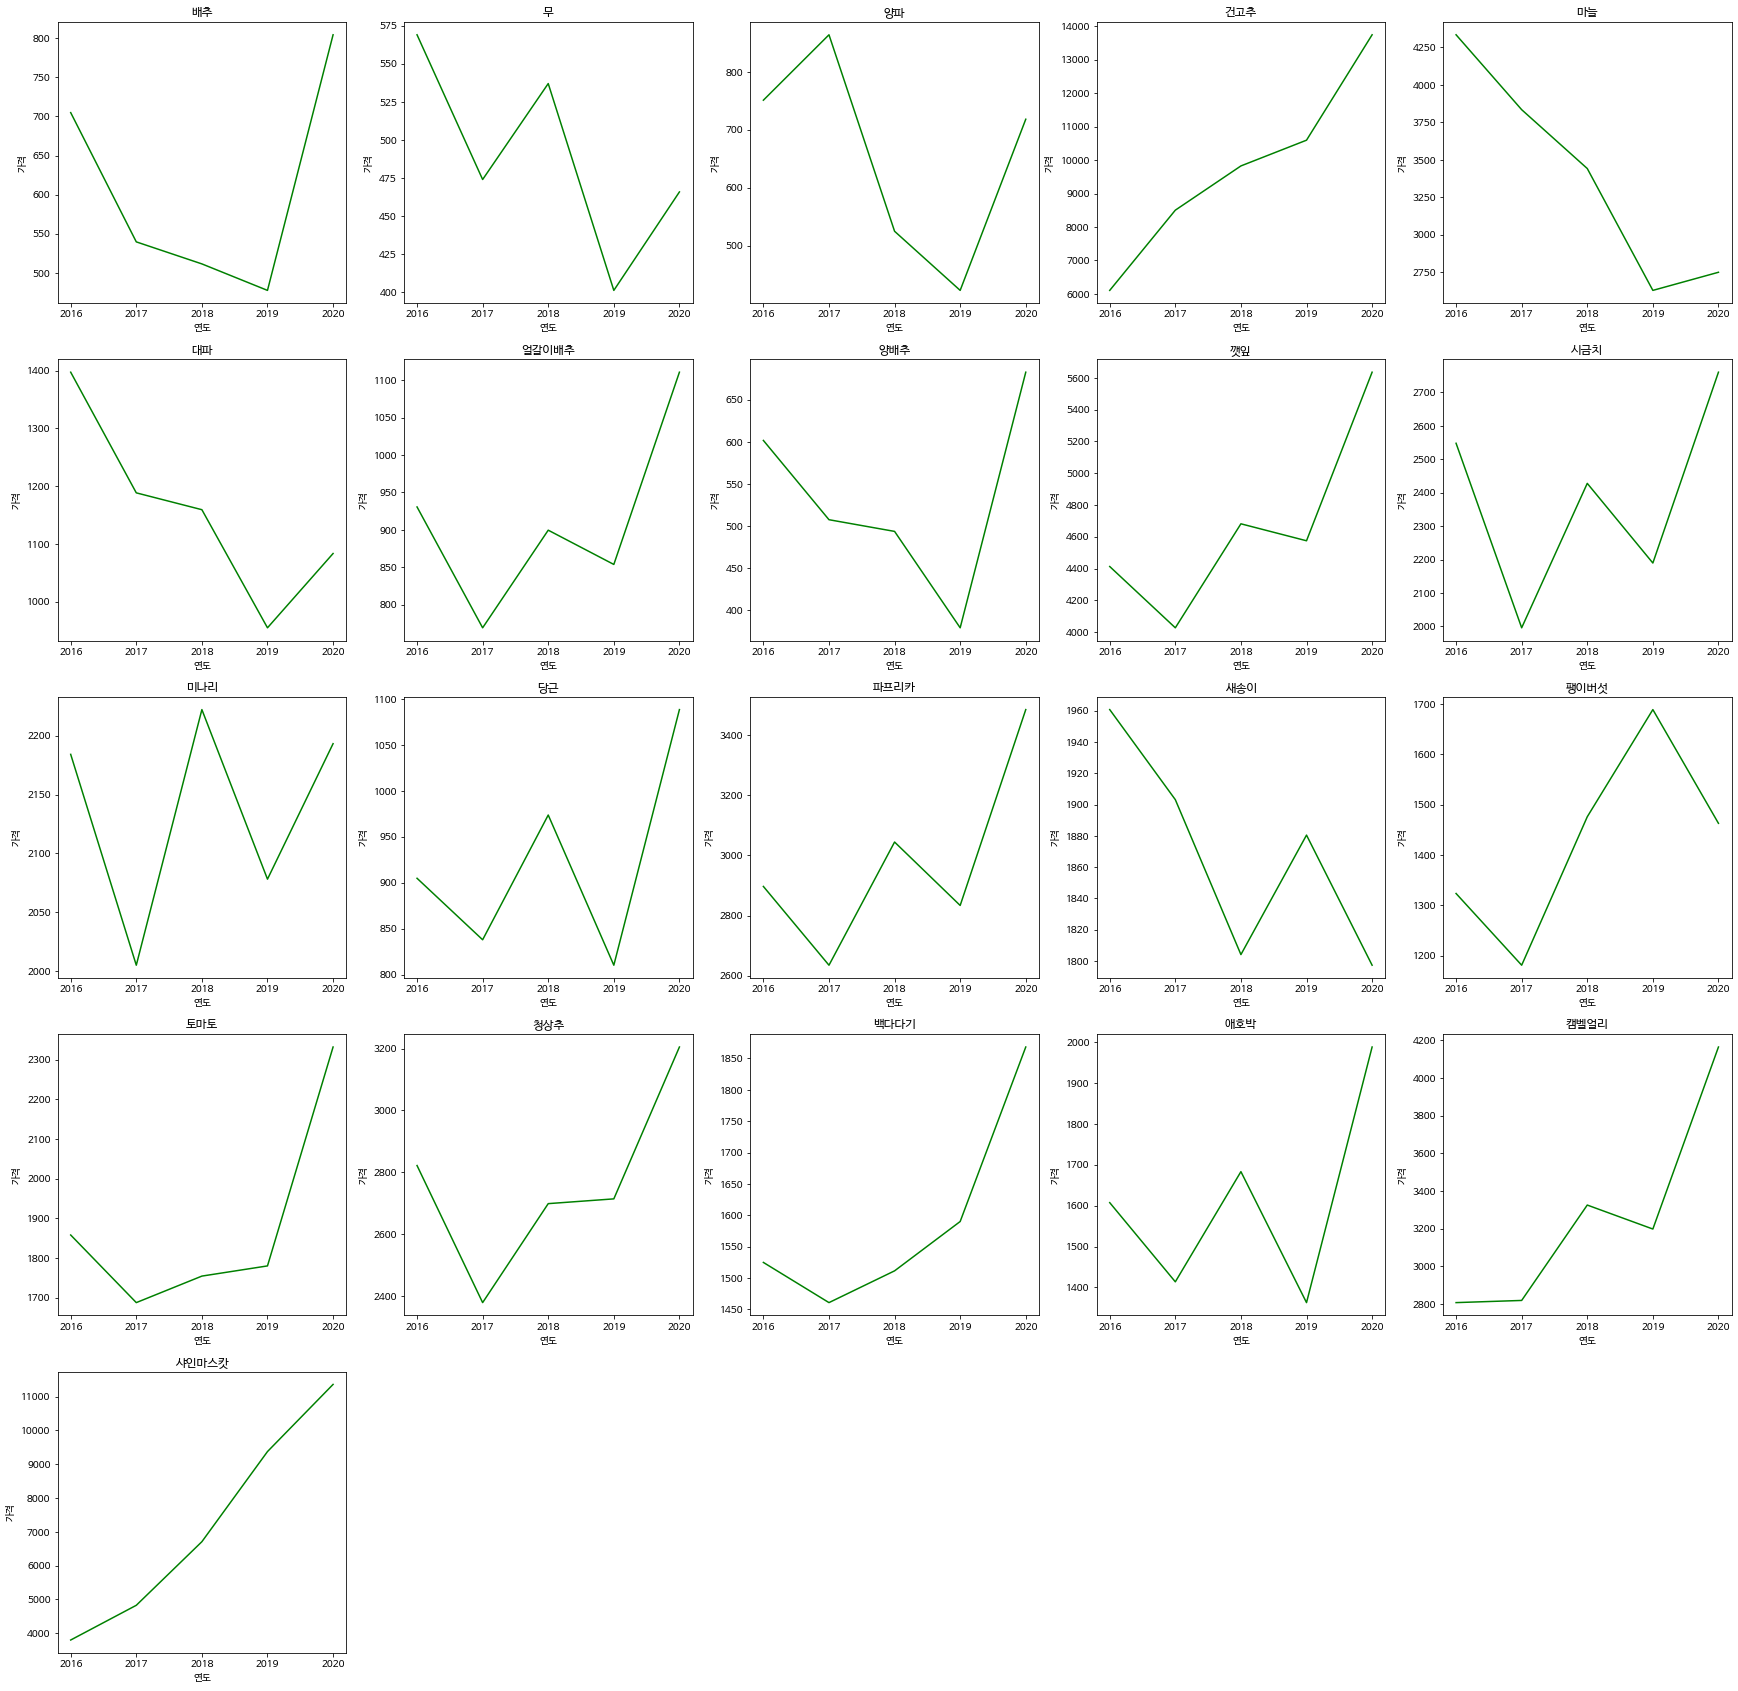

In [ ]:
fig = plt.figure(figsize = (30, 30))
for i, item in enumerate(order):
    ax1 = plt.subplot(5, 5, i+1)
    data = df2.query('품목 == "{}"'.format(item))
    ax = sns.lineplot(data = data, x = '연도', y = '가격', ci = None, color = 'g', ax = ax1)
    ax.set_title(item)
    ax.set_xticks(df2['연도'].unique())
plt.show()

** 연도별 가격 
- 배추 : 2019년까지 감소하다가 이후 급증
- 무 : W자 모양
- 양파 : 2019년까지 감소하다가 이후 증가
- 건고추 : 증가
- 마늘 :  2019년까지 감소하다가 이후 증가
- 대파 :  2019년까지 감소하다가 이후 증가
- 얼갈이배추 : W자모양
- 양배추 :  2019년까지 감소하다가 이후 증가
- 깻잎 : W자모양
- 시금치 : W자모양
- 미나리 : W자모양
- 당근 : W자모양
- 파프리카 : W자모양
- 새송이 : 2018년까지 증가 2019년 증가 2020 감소
- 팽이버섯 : 2019년까지 증가하다가 2020 감소
- 토마토 : 증가
- 청상추 : W자모양
- 백다다기 : 증가
- 애호박 : W자모양
- 캠벨얼리 : W자모양
- 샤인마스캇 : 증가
- 대부분의 품목이 2020년에 가격이 증가하는 걸 볼 수 있음.

## 월에 따른 각 품목별 가격

In [ ]:
df2.groupby(['월', '품목'])['가격'].mean().unstack()

품목           건고추           깻잎  ...         파프리카         팽이버섯
월                              ...                          
1    7872.316129  6692.890323  ...  4435.419355  1676.090323
2    8268.521127  4775.112676  ...  4124.457746  1419.457746
3    9508.954839  4111.916129  ...  3503.567742  1359.554839
4    8636.033333  3959.526667  ...  2881.593333  1244.073333
5    8415.696774  3895.367742  ...  2218.587097  1110.664516
6    8669.626667  2666.473333  ...  1782.313333  1075.086667
7    9109.619355  3358.277419  ...  1425.993548  1013.535484
8   12754.941935  5543.277419  ...  3045.748387  1357.412903
9   11991.412162  6284.263514  ...  4249.054054  1978.236486
10   9654.717742  4402.290323  ...  3087.669355  1857.709677
11   8928.158333  3965.108333  ...  2205.650000  1594.850000
12  10709.072581  5759.846774  ...  2306.870968  1568.290323

[12 rows x 21 columns]

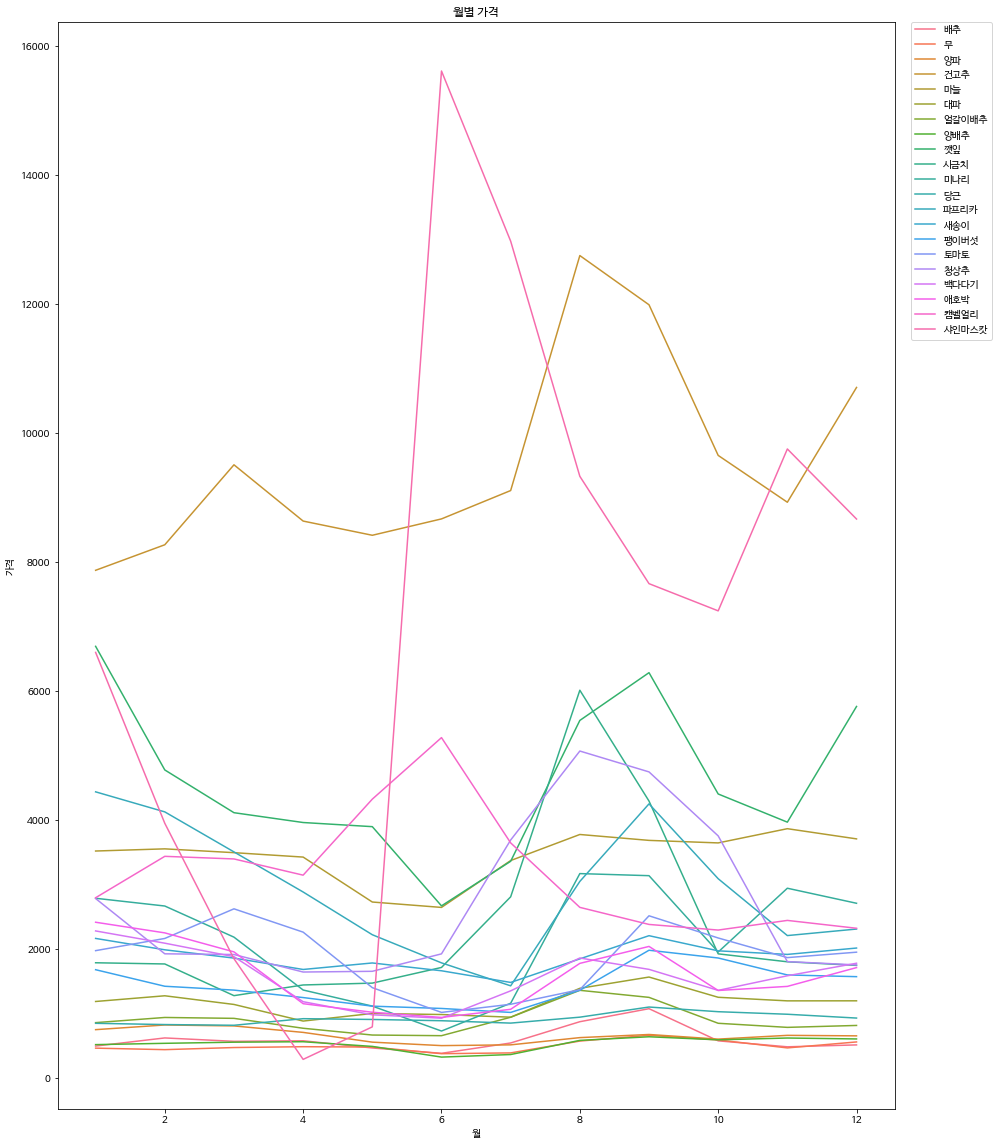

In [ ]:

plt.figure(figsize=(15, 20))
ax = sns.lineplot(data=df2, x="월", y="가격", hue="품목", ci = None)
ax.set_title('월별 가격')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

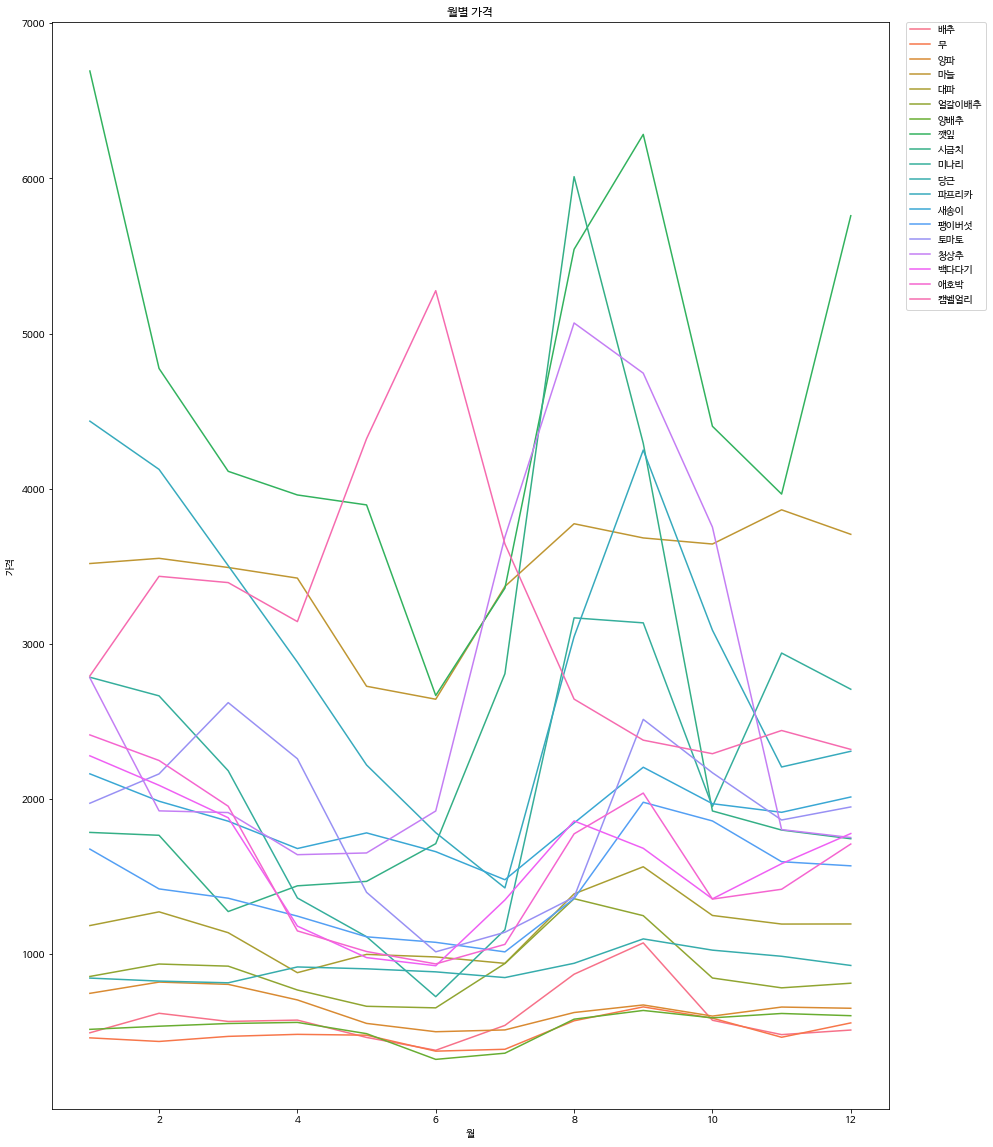

In [ ]:
# 건고추 샤인머스켓 제거
plt.figure(figsize=(15, 20))
ax = sns.lineplot(data=df2.query('품목 != "건고추" and 품목 != "샤인마스캇"'), x="월", y="가격", hue="품목", ci = None)
ax.set_title('월별 가격')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
fig = plt.figure(figsize = (30, 30))
for i, item in enumerate(order):
    ax1 = plt.subplot(5, 5, i+1)
    data = df2.query('품목 == "{}"'.format(item))
    ax = sns.lineplot(data = data, x = '월', y = '가격', ci = None, color = 'g', ax = ax1)
    ax.set_title(item)
    ax.set_xticks(df2['월'].unique())
plt.show()

* 샤인마스캇의 월별 가격 변동이 엄청나다. (5월 6월 가격 8배 차이,,)
* 보통1, 2, 3, 4, 5월은 감소하다가 7, 8, 9, 10월이 비싼듯,,?

## 요일에 따른 각 품목별 가격

In [ ]:
pd.DataFrame(df2.groupby(['요일', '품목'])['가격'].mean())

가격
요일  품목                
금요일 건고추   10633.572581
    깻잎     5291.322581
    당근     1054.681452
    대파     1311.274194
    마늘     4008.911290
...                ...
화요일 청상추    3156.769231
    캠벨얼리   3737.716599
    토마토    2096.582996
    파프리카   3534.056680
    팽이버섯   1718.133603

[147 rows x 1 columns]

In [ ]:
df_group = pd.DataFrame(df2.groupby(['요일', '품목'])['가격'].mean())
df_group = df_group.reset_index()
df_group = pd.concat([df_group.query('요일 == "월요일"'), df_group.query('요일 == "화요일"'), df_group.query('요일 == "수요일"'), df_group.query('요일 == "목요일"'), df_group.query('요일 == "금요일"'), df_group.query('요일 == "토요일"'),df_group.query('요일 == "일요일"')], axis = 0)

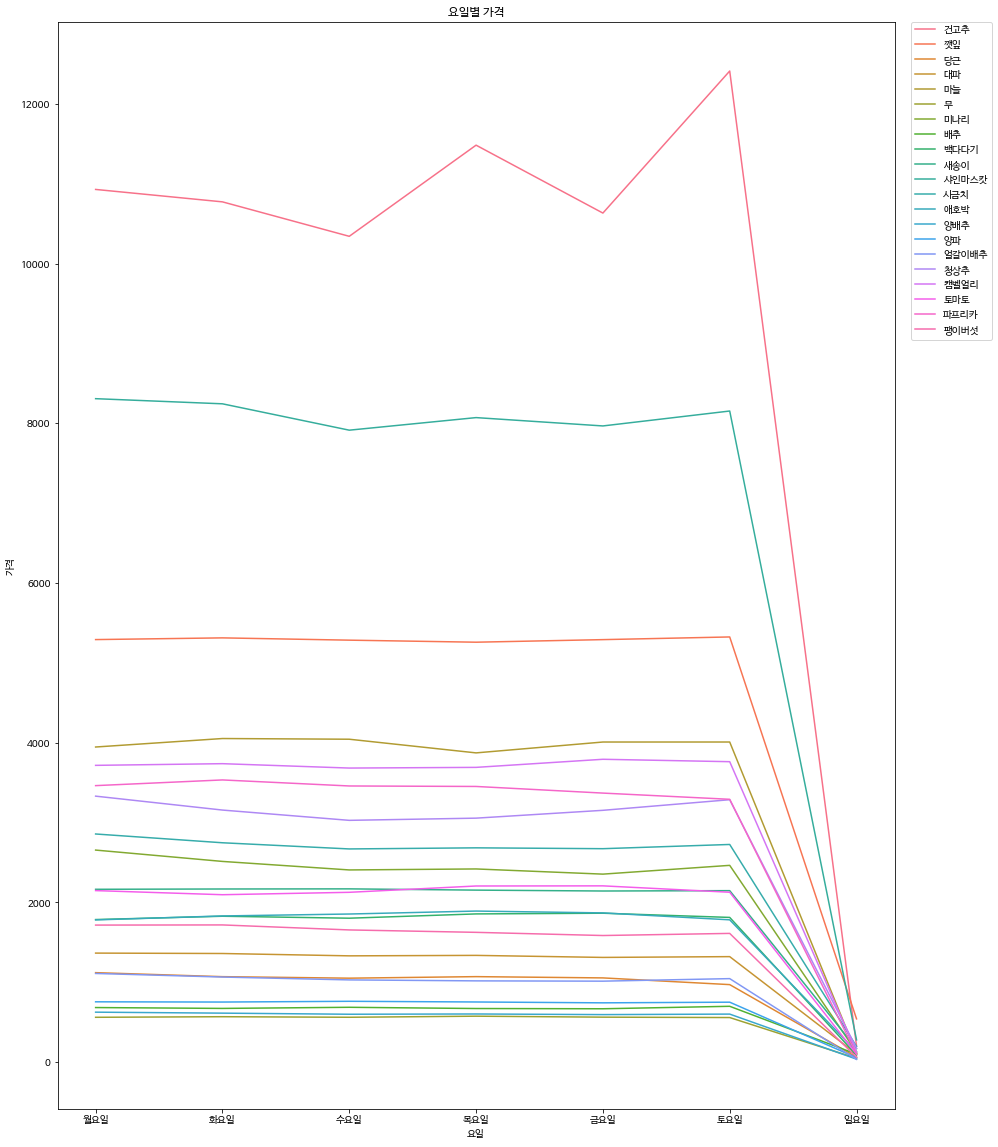

In [ ]:
plt.figure(figsize=(15, 20))
ax = sns.lineplot(data=df_group, x="요일", y="가격", hue="품목", ci = None)
ax.set_title('요일별 가격')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
fig = plt.figure(figsize = (30, 30))
for i, item in enumerate(order):
    ax1 = plt.subplot(5, 5, i+1)
    data = df_group.query('품목 == "{}"'.format(item))
    ax = sns.lineplot(data = data, x = '요일', y = '가격', ci = None, color = 'g', ax = ax1)
    ax.set_title(item)
plt.show()

* 요일에 따라 큰 변동은 없다.
* 건고추는 토요일에 비싸다 (?)

# 계절 / 주중 주말 요인

In [ ]:
# 계절

def get_season(x):
    season = ''
    if (x == 1) or (x == 2) or (x == 12):
        season = 'winter'
    elif (x == 3) or (x == 4) or (x == 5):
        season = 'spring'
    elif (x == 6) or (x == 7) or (x == 8):
        season = 'summer'
    elif (x == 9) or (x == 10) or (x == 11):
        season = 'fall'
    else:
        season = ''
    return season

In [ ]:
# 주중 / 주말

def get_week(x):
    week = ''
    if (x == '월요일') or (x == '화요일') or (x == '수요일') or ( x == '목요일') or ( x == '금요일') :
        week = '주중'
    elif (x == '토요일') or (x == '일요일') :
        week = '주말'
    else:
        week = ''
    return week

In [ ]:
df2['season'] = df2['월'].apply(lambda x: get_season(x)).astype('category')
df2['week'] = df2['요일'].apply(lambda x : get_week(x)).astype('category')
df2

date    연도  월   일     품목  ...        거래량     경유가격     농산물  season  week
0      2016-01-01  2016  1   1     배추  ...        0.0  1191.69  101.55  winter    주중
1      2016-01-02  2016  1   2     배추  ...    80860.0  1190.58  101.55  winter    주말
2      2016-01-03  2016  1   3     배추  ...        0.0  1189.58  101.55  winter    주말
3      2016-01-04  2016  1   4     배추  ...  1422742.5  1187.96  101.55  winter    주중
4      2016-01-05  2016  1   5     배추  ...  1167241.0  1185.81  101.55  winter    주중
...           ...   ... ..  ..    ...  ...        ...      ...     ...     ...   ...
36388  2020-09-24  2020  9  24  샤인마스캇  ...   283196.9  1128.91  139.93    fall    주중
36389  2020-09-25  2020  9  25  샤인마스캇  ...   303779.6  1128.43  139.93    fall    주중
36390  2020-09-26  2020  9  26  샤인마스캇  ...   313295.7  1127.22  139.93    fall    주말
36391  2020-09-27  2020  9  27  샤인마스캇  ...     9734.0  1126.94  139.93    fall    주말
36392  2020-09-28  2020  9  28  샤인마스캇  ...   382263.4  1126.46  139.93    fall    주중

[36393 rows x 13 columns]

### 계절 평균 거래량

In [ ]:
df2.groupby(['품목', '연도', 'season'])['거래량'].mean().unstack()

season              fall         spring         summer         winter
품목   연도                                                              
건고추  2016    3502.647253    1628.043478    2027.261957    1440.568132
     2017   21687.118681    1390.957609    1154.308696    9932.676667
     2018    9692.317582     398.900000    3377.791304    2467.862222
     2019    2628.010989     687.151087    2018.489130     612.844444
     2020    3702.028571     434.052174    1480.438043     654.678333
...                  ...            ...            ...            ...
팽이버섯 2016   98736.054945  115814.019565  107302.611957  109737.812088
     2017  107267.657143  111281.360870  107812.164130  109574.948889
     2018   92814.324176  113868.641304  101396.891304  101206.546667
     2019   94983.528571  106018.666304   96612.455435   99356.948889
     2020  110891.067857  105083.081522  102725.184783   90688.343333

[105 rows x 4 columns]

In [ ]:
fig = plt.figure(figsize = (30, 30))
for i, item in enumerate(order):
    ax1 = plt.subplot(5, 5, i+1)
    data = df2.query('품목 == "{}"'.format(item))
    ax = sns.barplot(data = data, x = '연도', y = '거래량', hue = 'season', ci = None, ax = ax1)
    ax.set_title(item)
plt.show()

* 계절성이 보인다.
- 배추 : 가을
- 무 : 가을
- 양파 : 봄, 여름
- 건고추 : 2017년 가을에 거래량이 엄청 많다.
- 마늘 :  봄, 여름
- 대파 :  여름이 가장 적고 나머지는 비슷
- 얼갈이배추 : 겨울에 가장 적다
- 양배추 :  비슷
- 깻잎 : 여름 > 봄 > 가을 > 겨울
- 시금치 : 겨울 > 봄 > 가을 > 여름
- 미나리 : 봄
- 당근 : 비슷
- 파프리카 : 여름 > 봄 > 가을 > 겨울
- 새송이 : 비슷
- 팽이버섯 : 비슷
- 토마토 : 봄 > 여름
- 청상추 : 봄 > 가을 > 여름 > 겨울
- 백다다기 : 봄 > 여름
- 애호박 : 겨울에 가장 적다
- 캠벨얼리 : 여름, 가을에만 거래
- 샤인마스캇 : 가을, 2020년에 가을에 거래량이 급증했다.

### 주중, 주말 평균 거래량

In [ ]:
df2.groupby(['품목', '연도', 'week'])['거래량'].mean().unstack()

week                 주말             주중
품목   연도                               
건고추  2016    797.574286    2691.093487
     2017    439.305714   11751.946538
     2018    501.500962    5361.716475
     2019    599.240385    1842.539847
     2020    488.251282    1448.386598
...                 ...            ...
팽이버섯 2016  61018.003810  126785.293487
     2017  59848.068571  128829.458846
     2018  57101.560577  120385.285057
     2019  56056.833654  116466.586207
     2020  56385.738462  119930.532990

[105 rows x 2 columns]

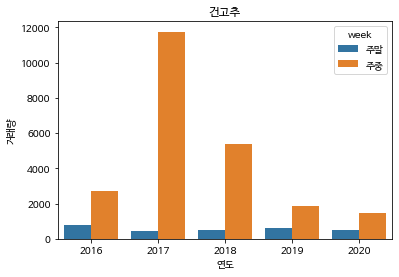

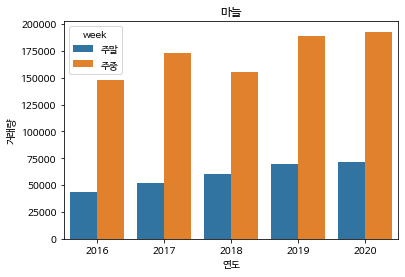

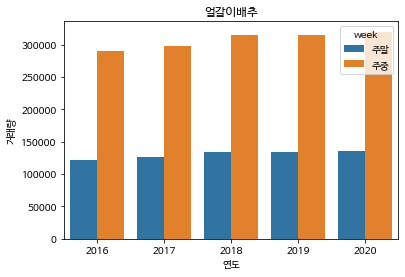

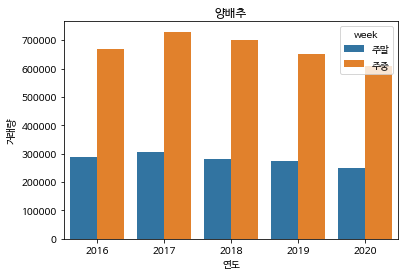

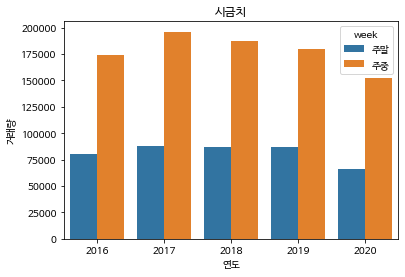

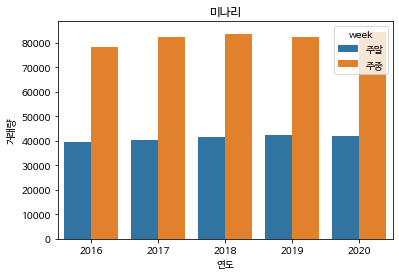

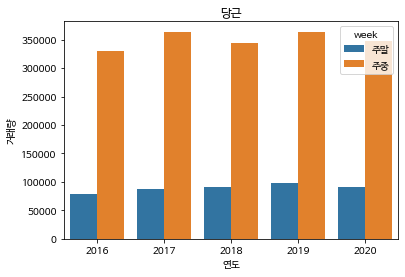

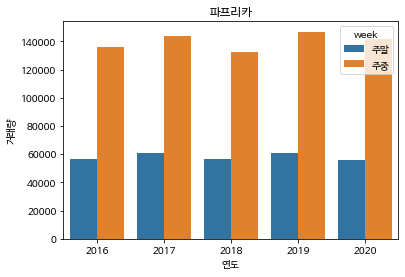

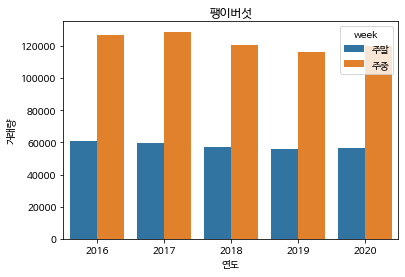

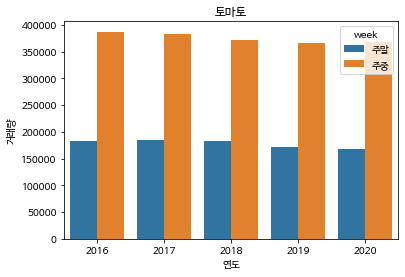

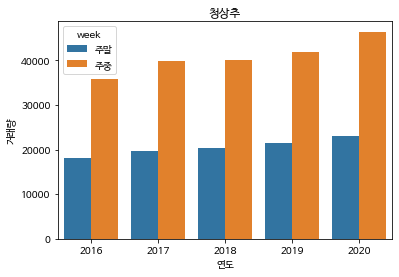

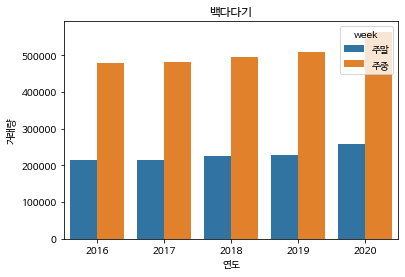

In [ ]:
for item in order:
    data = df2.query('품목 == "{}"'.format(item))
    ax = sns.barplot(data = data, x = '연도', y = '거래량', hue = 'week', ci = None)
    ax.set_title(item)
    plt.show()

### 계절 평균 가격

In [ ]:
df2.groupby(['품목', '연도', 'season'])['가격'].mean().unstack()

season             fall        spring        summer        winter
품목   연도                                                          
건고추  2016   5972.032967   5402.152174   6242.065217   6814.736264
     2017  12427.582418   6078.586957   7890.010870   7638.833333
     2018  10289.329670   8705.402174  11988.108696   8286.511111
     2019   9560.395604  10857.173913  11612.076087  10326.600000
     2020  20092.964286  13236.315217  13240.032609  12324.133333
...                 ...           ...           ...           ...
팽이버섯 2016   1834.582418   1227.391304    854.923913   1383.615385
     2017   1252.043956   1263.130435    942.423913   1269.755556
     2018   1988.527473   1173.782609   1152.608696   1596.966667
     2019   2228.142857   1282.695652   1603.108696   1646.155556
     2020   1782.750000   1243.163043   1194.326087   2062.616667

[105 rows x 4 columns]

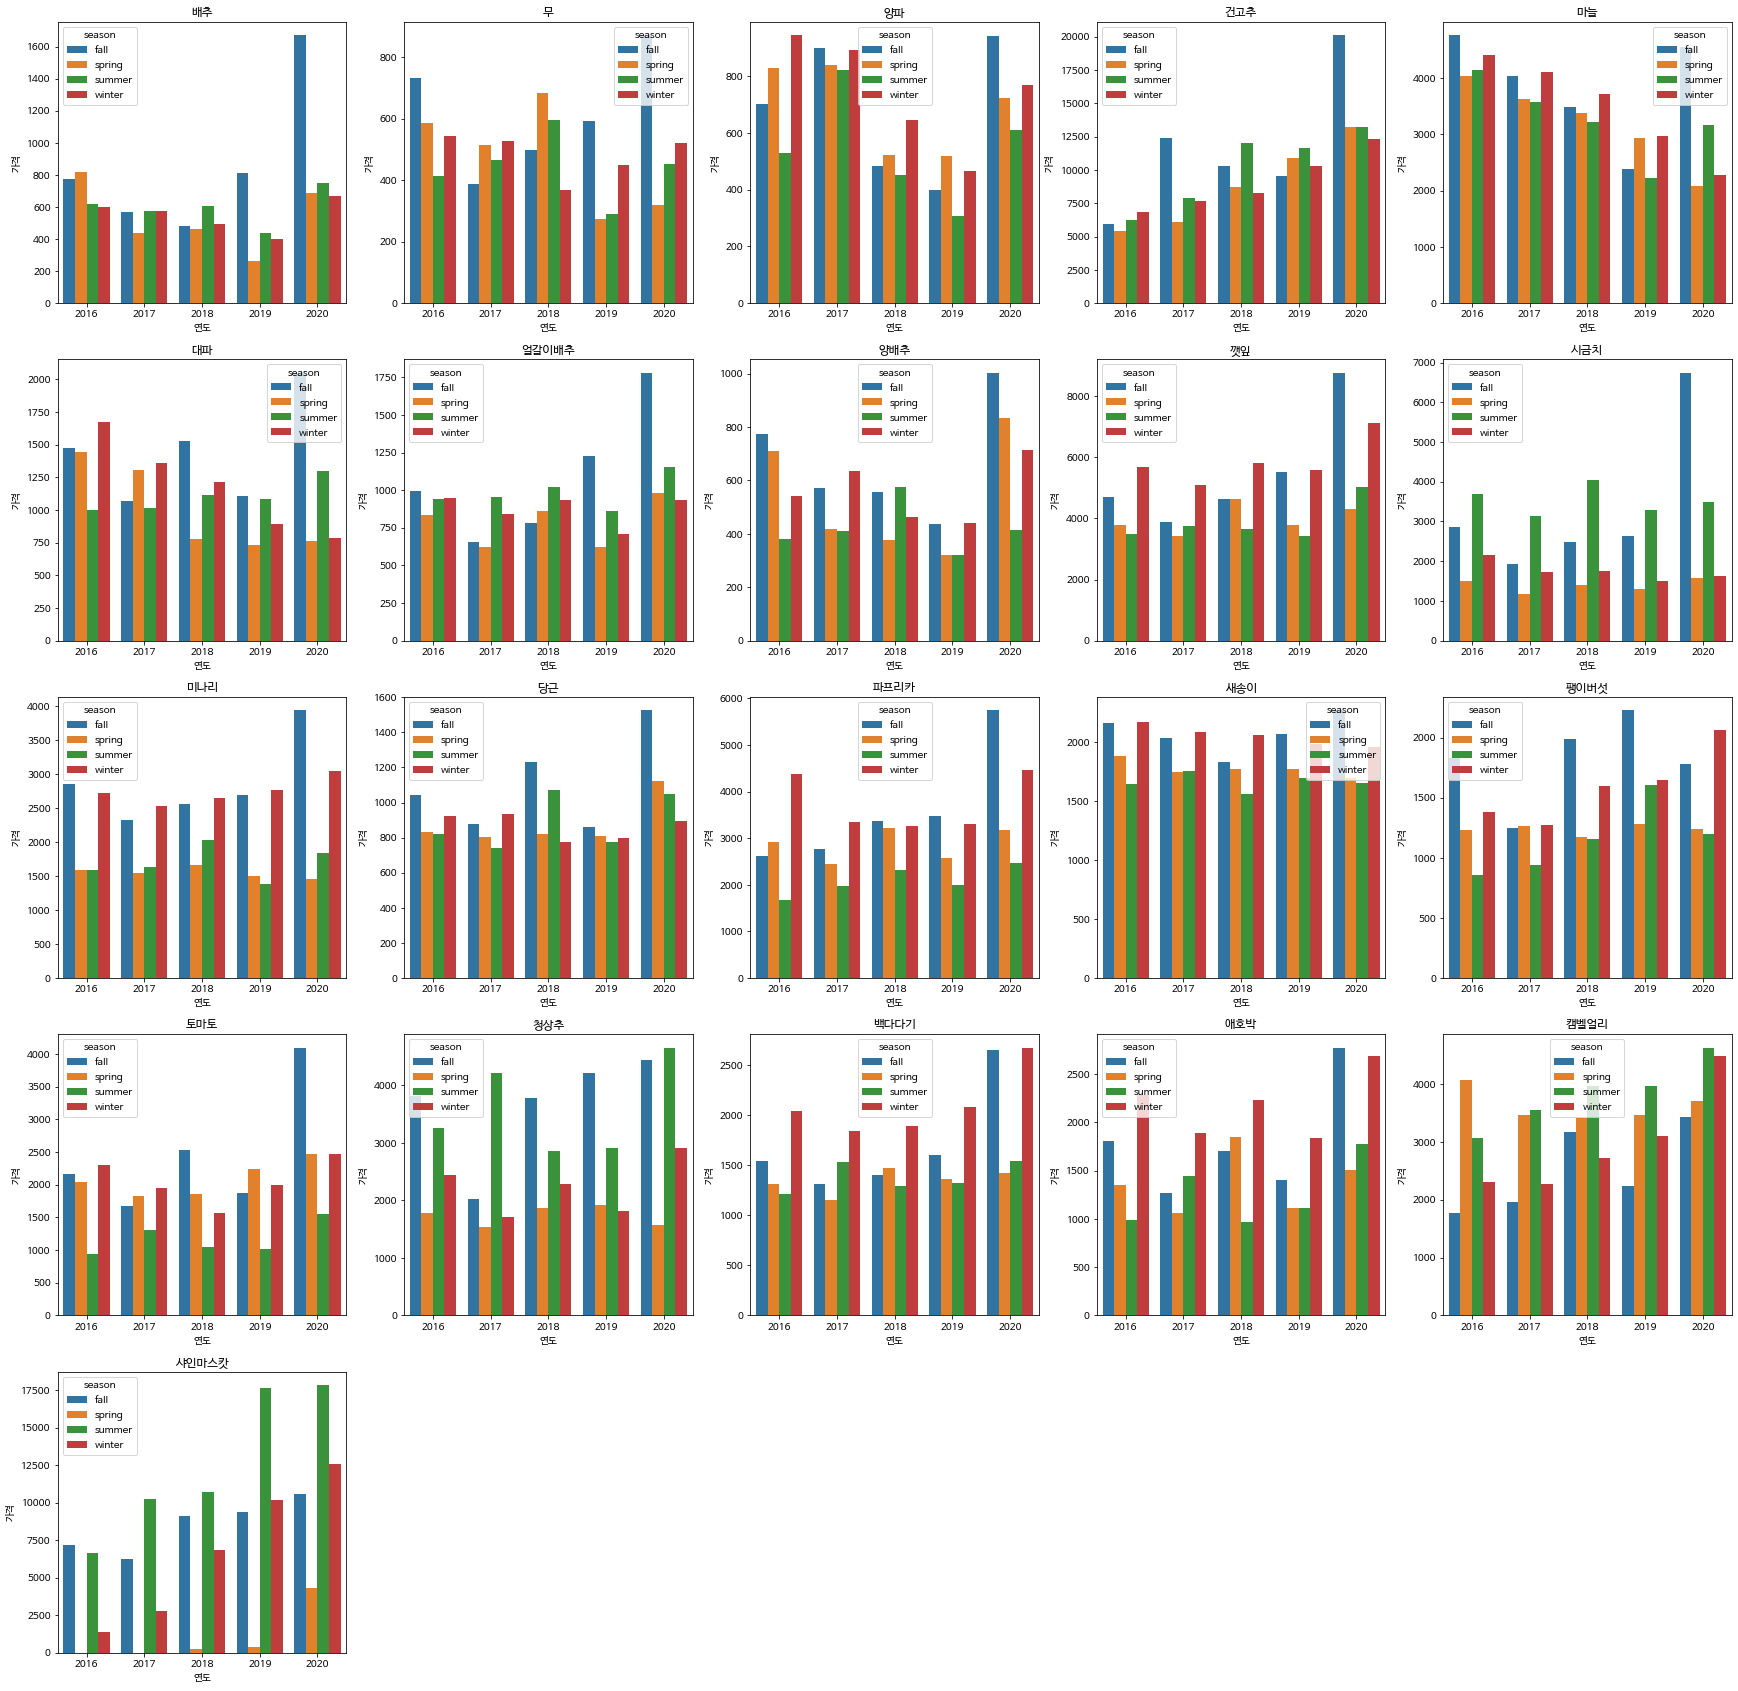

In [ ]:
fig = plt.figure(figsize = (30, 30))
for i, item in enumerate(order):
    ax1 = plt.subplot(5, 5, i+1)
    data = df2.query('품목 == "{}"'.format(item))
    ax = sns.barplot(data = data, x = '연도', y = '가격', hue = 'season', ci = None, ax = ax1)
    ax.set_title(item)
plt.show()

** 계절별 가격

- 배추 : 2020년 가을에 급증
- 무 : 
- 양파 : 2018, 2019년에 가격이 낮았다.
- 건고추 : 2020년 가을에 급증
- 마늘 :  전체적으로 가격이 하락
- 대파 :  2020년 가을에 급증
- 얼갈이배추 : 2020년 가을에 급증
- 양배추 :  2020년에 가격이 상대적으로 높다.
- 깻잎 : 2020년 가을에 급증, 겨울에 비싸다.
- 시금치 : 2020년 가을에 급증, 보통 여름 > 가을 > 겨울 > 봄
- 미나리 : 2020년 가을에 급증, (가을, 겨울) > (봄, 여름)
- 당근 : 2020년 가을에 급증
- 파프리카 : 2020년 가을에 급증
- 새송이 : 비슷
- 팽이버섯 : (가을, 겨울) > (봄, 여름)
- 토마토 : 2020년 가을에 급증, 여름에 가장 싸다
- 청상추 : (여름, 가을) > (봄, 겨울)
- 백다다기 : 가격 증가, 2020년 가을에 급증, (가을, 겨울) > (봄, 여름)
- 애호박 : 2020년 가을에 급증, (가을, 겨울 ) > (봄, 여름)
- 캠벨얼리 : 여름에 가장 비쌈
- 샤인마스캇 : 2019, 2020년 여름에 가격 급증, (여름, 가을 ) > (봄, 겨울)
- 주로 2020년 가을에 가격이 증가함.

###  주중/주말 평균 가격

In [ ]:
df2.groupby(['품목', '연도', 'week'])['가격'].mean().unstack()

week                주말            주중
품목   연도                             
건고추  2016  4799.504762   6631.862069
     2017  5438.495238   9740.284615
     2018  5670.663462  11479.574713
     2019  6829.105769  12093.233716
     2020  9663.294872  15382.154639
...                ...           ...
팽이버섯 2016   802.857143   1533.061303
     2017   690.628571   1379.265385
     2018   883.923077   1711.812261
     2019   968.153846   1975.942529
     2020   841.384615   1712.860825

[105 rows x 2 columns]

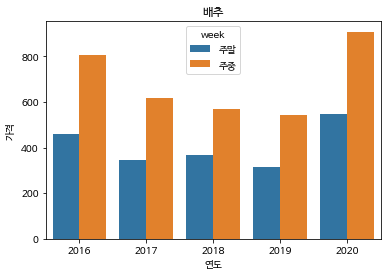

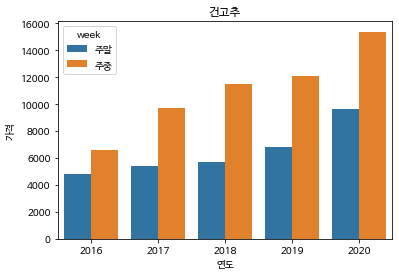

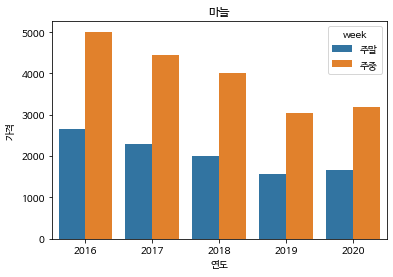

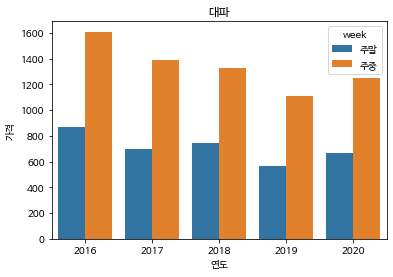

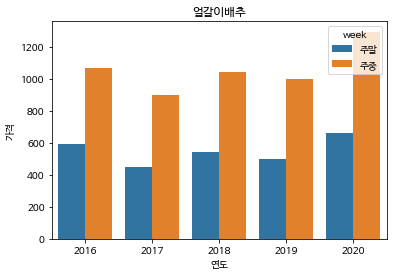

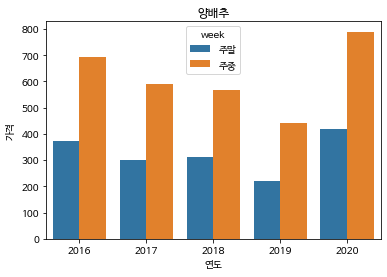

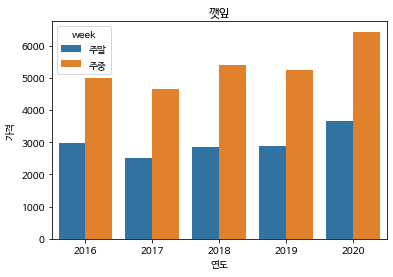

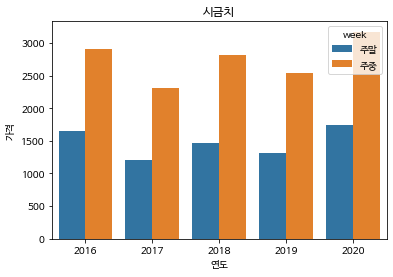

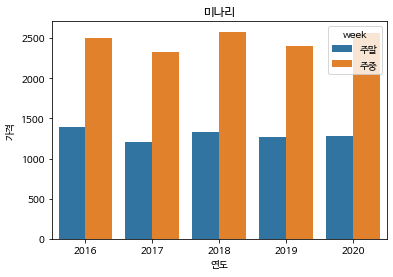

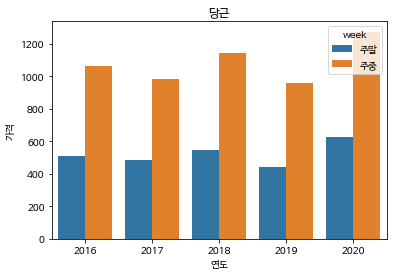

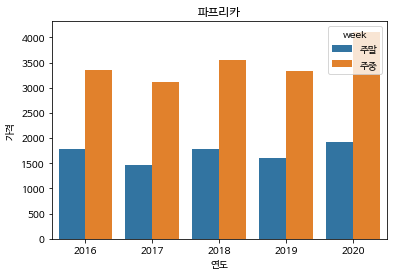

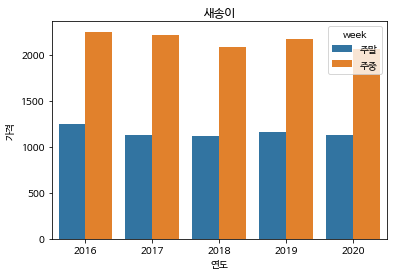

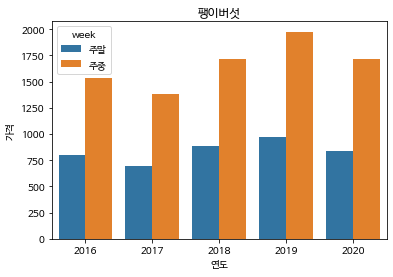

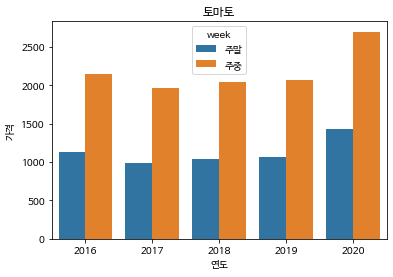

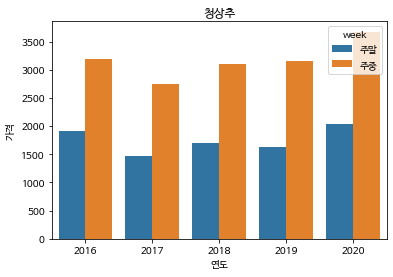

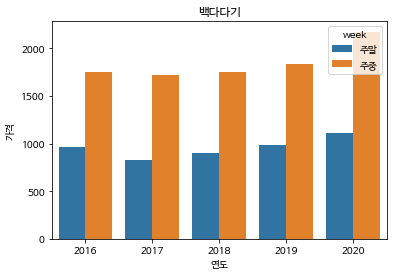

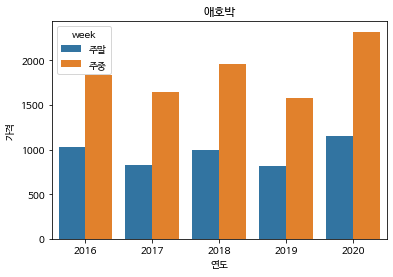

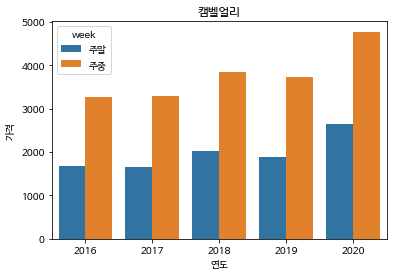

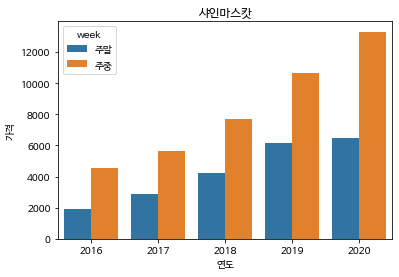

In [ ]:
for item in order:
    data = df2.query('품목 == "{}"'.format(item))
    ax = sns.barplot(data = data, x = '연도', y = '가격', hue = 'week', ci = None)
    ax.set_title(item)
    plt.show()

# 경유가격, 농산물가격지수

## 경유

In [ ]:
mean_trade = df2.groupby(['품목'])['거래량'].mean().to_frame().sort_values(by = '거래량', ascending = False)
mean_trade

In [ ]:
# 주산지별 경유가격 평균
mean_oil = df2.groupby(['주산지'])['경유가격'].mean().to_frame().sort_values(by = '경유가격', ascending = False)
mean_oil

경유가격
주산지             
제주   1345.112377
강원   1295.546619
경기   1290.111489
충남   1286.630058
전남   1279.054074
전북   1270.201691
부산   1269.728471
경북   1267.818650
경남   1266.396203

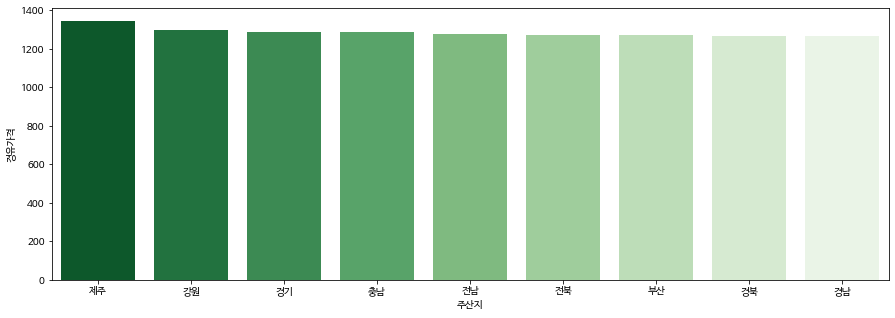

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data = mean_oil, x = mean_oil.index, y = '경유가격', ci = None, palette = 'Greens_r')

제주도가 가장 비싸다

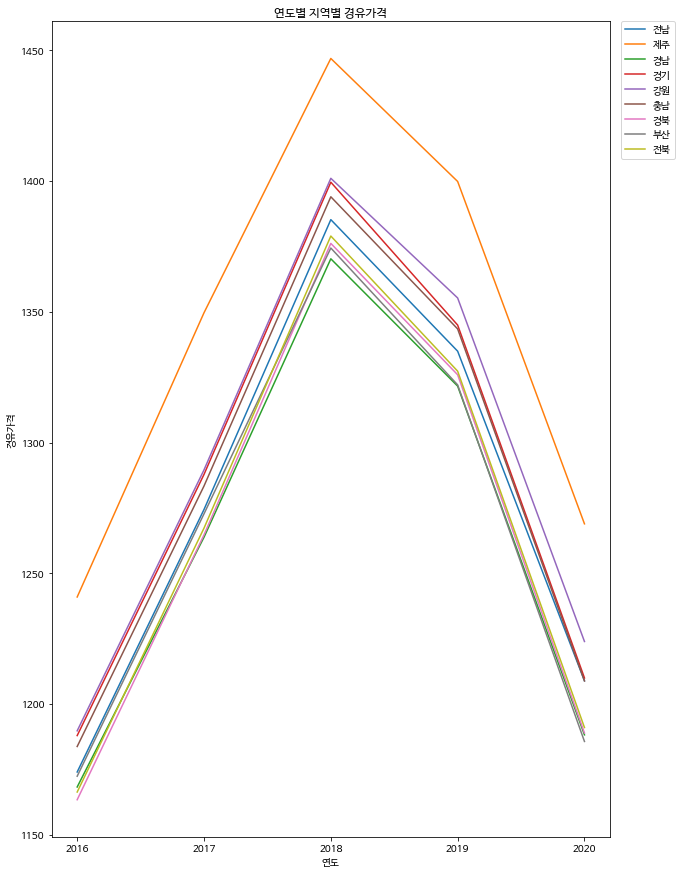

In [ ]:
# 연도별 지역별 경유가격
plt.figure(figsize=(10, 15))
ax = sns.lineplot(data=df2, x="연도", y="경유가격", hue="주산지", ci = None)
ax.set_title('연도별 지역별 경유가격')
ax.set_xticks(df2['연도'].unique())
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

2018년에 가장 비쌌다.

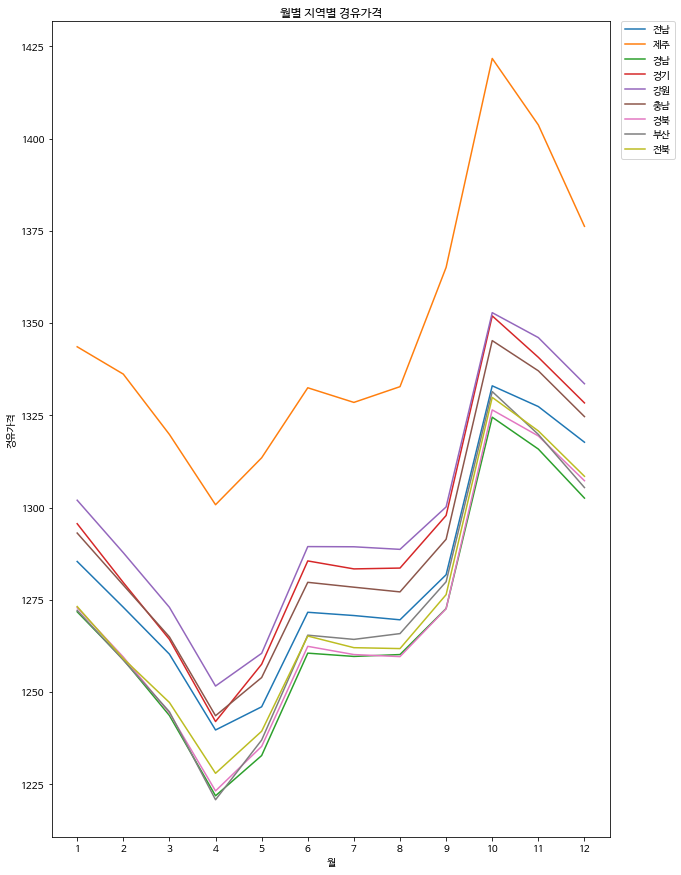

In [ ]:
# 월별 지역별 경유가격
plt.figure(figsize=(10, 15))
ax = sns.lineplot(data=df2, x="월", y="경유가격", hue="주산지", ci = None)
ax.set_title('월별 지역별 경유가격')
ax.set_xticks(df2['월'].unique())
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

겨울에 비싸다

## 농산물 가격 지수

In [ ]:
df2.groupby(['연도', '월'])['농산물'].mean().unstack()

월         1       2       3       4   ...      9       10      11      12
연도                                    ...                                
2016  101.55  109.33  106.08  104.95  ...  114.25  107.52  103.40  106.64
2017  113.46  114.04  111.66  107.05  ...  118.76  109.84  101.54  105.58
2018  111.31  121.47  115.30  115.77  ...  136.45  126.49  116.52  116.91
2019  117.21  119.43  116.05  116.44  ...  117.58  116.95  109.77  112.25
2020  118.41  116.36  116.22  115.52  ...  139.93     NaN     NaN     NaN

[5 rows x 12 columns]

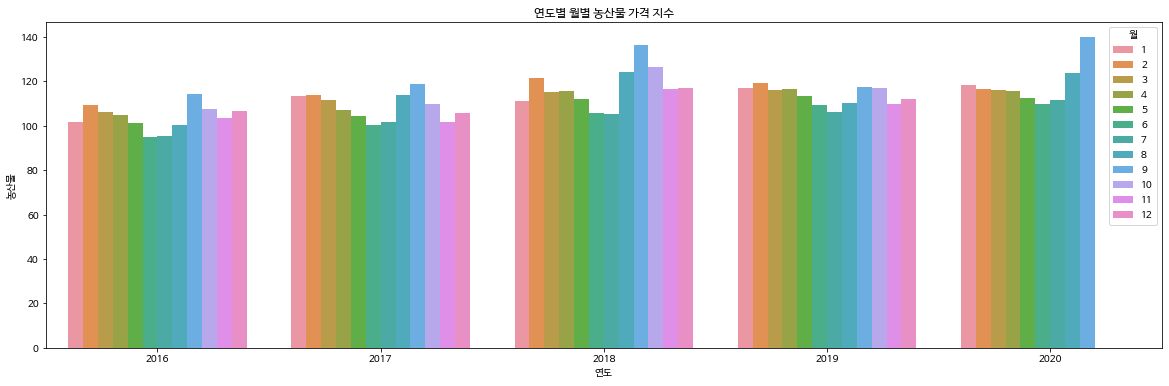

In [ ]:
plt.figure(figsize = (20, 6))
ax = sns.barplot(data = df2, x = '연도', y = '농산물', hue = '월', ci = None)
ax.set_title("연도별 월별 농산물 가격 지수")
plt.show()

보통 농산물 가격 지수는 9월에 높다.